In [1]:
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
import dask
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import pandas as pd
import datetime
import copy
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
# %matploblib inline

In [2]:
# iclassdir = '/lustre/or-hydra/cades-arm/proj-shared/iclass/cacti/radar_processing/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# stats_file = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/stats/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# stats_file3d = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/stats/stats_3d_ppi_20181015.0000_20190303.0000.nc'

# iclassdir = '/Users/feng045/data/cacti/'
# terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
# stats_file = f'{iclassdir}stats/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
# stats_file3d = f'{iclassdir}stats/stats_3d_ppi_20181015.0000_20190303.0000.nc'
# sat_file = f'{iclassdir}stats/stats_goes16_20181015.0000_20190303.0000.nc'
# sonde_file = f'{iclassdir}stats/interpsonde_celltrack_20181015.0000_20190303.0000.nc'

iclassdir = '/Users/feng045/data/cacti/'
terrain_file = f'{iclassdir}corgridded_terrain.c0/topo_cacti_csapr2_large.nc'
statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1/stats/'
# statsdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_mpgridded_celltracking.c1/stats/'
stats_file = f'{statsdir}/stats_tracknumbersv1.0_20181015.0000_20190303.0000.nc'
stats_file3d = f'{statsdir}/stats_3d_ppi_20181015.0000_20190303.0000.nc'
sat_file = f'{statsdir}/stats_goes16_dilated_20181015.0000_20190303.0000.nc'
# sat_file = f'{statsdir}/stats_goes16_undilated_20181015.0000_20190303.0000.nc'
sonde_file = f'{statsdir}/interpsonde_celltrack_20181015.0000_20190303.0000.nc'

radar_lat = -32.1264
radar_lon = -64.7284

# figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1/figures/'
# figdir = f'{iclassdir}taranis_corcsapr2cfrppiqcM1_celltracking.c1.test/figures/'
figdir = f'/Users/feng045/results/ICLASS/CACTI/CSAPR/figures/stats/celltrack_environment_stats/'
# figdir = f'/Users/feng045/results/ICLASS/CACTI/CSAPR/figures/stats_mpgrid/celltrack_environment_stats/'
figdir_jointhist = f'{figdir}jointhist/'
os.makedirs(figdir, exist_ok=True)
os.makedirs(figdir_jointhist, exist_ok=True)

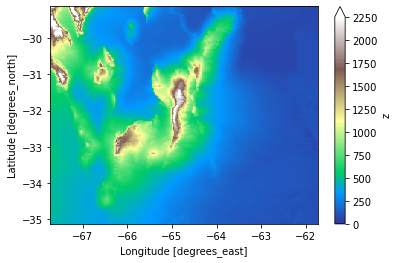

In [3]:
terr = xr.open_dataset(terrain_file)
topoZ = terr['z']
topoLon = terr['x']
topoLat = terr['y']
# topoZ = terr.hgt
# topoLon = terr.longitude
# topoLat = terr.latitude

topoZ.plot(vmin=0, vmax=2250, cmap='terrain')

In [4]:
# Read sonde data
sonde = xr.open_dataset(sonde_file)
sonde.dims['tracks']

6551

In [5]:
# Read 2D track data
stats2d = xr.open_dataset(stats_file)
time_res = stats2d.attrs['time_resolution_hour']
pixel_radius = stats2d.attrs['pixel_radius_km']
stats2d.dims['tracks']

6551

In [6]:
# Read 3D data
stats3d = xr.open_dataset(stats_file3d)
stats3d.dims['tracks']

6551

In [7]:
# Read satellite data
sat = xr.open_dataset(sat_file, drop_variables=['basetime', 'cell_area'])
sat.dims['tracks']

6551

In [8]:
# Combine 2D and 3D datasets by coordinates
stats = xr.combine_by_coords([stats2d, stats3d, sat, sonde], combine_attrs='override')
stats

<xarray.Dataset>
Dimensions:                    (reltime: 4, times: 60, tracks: 6551, z: 45)
Coordinates:
  * tracks                     (tracks) int32 0 1 2 3 4 ... 6547 6548 6549 6550
  * times                      (times) int32 0 1 2 3 4 5 6 ... 54 55 56 57 58 59
  * z                          (z) float64 0.0 500.0 1e+03 ... 2.15e+04 2.2e+04
  * reltime                    (reltime) int32 0 -1 -2 -3
Data variables:
    cloud_top_temperature_min  (tracks, times) float32 ...
    temperature_ir_min         (tracks, times) float32 ...
    cloud_top_height_max       (tracks, times) float32 ...
    cloud_top_pressure_min     (tracks, times) float32 ...
    area_liquid                (tracks, times) float32 ...
    area_ice                   (tracks, times) float32 ...
    lwp_max                    (tracks, times) float32 ...
    iwp_max                    (tracks, times) float32 ...
    lifetime                   (tracks) float64 ...
    basetime                   (tracks, times) datetime64[ns] 2018-10-16T12:4...
    core_meanlat               (tracks, times) float32 ...
    core_meanlon               (tracks, times) float32 ...
    core_mean_y                (tracks, times) float32 ...
    core_mean_x                (tracks, times) float32 ...
    cell_meanlat               (tracks, times) float32 ...
    cell_meanlon               (tracks, times) float32 ...
    cell_mean_y                (tracks, times) float32 ...
    cell_mean_x                (tracks, times) float32 ...
    cell_minlat                (tracks, times) float32 ...
    cell_minlon                (tracks, times) float32 ...
    cell_maxlat                (tracks, times) float32 ...
    cell_maxlon                (tracks, times) float32 ...
    cell_min_y                 (tracks, times) float32 ...
    cell_min_x                 (tracks, times) float32 ...
    cell_max_y                 (tracks, times) float32 ...
    cell_max_x                 (tracks, times) float32 ...
    dilatecell_meanlat         (tracks, times) float32 ...
    dilatecell_meanlon         (tracks, times) float32 ...
    dilatecell_mean_y          (tracks, times) float32 ...
    dilatecell_mean_x          (tracks, times) float32 ...
    core_radius                (tracks, times) float32 ...
    cell_radius                (tracks, times) float32 ...
    core_area                  (tracks, times) float32 ...
    cell_area                  (tracks, times) float32 ...
    maxdbz                     (tracks, times) float32 ...
    maxETH_10dbz               (tracks, times) float32 ...
    maxETH_20dbz               (tracks, times) float32 ...
    maxETH_30dbz               (tracks, times) float32 ...
    maxETH_40dbz               (tracks, times) float32 ...
    maxETH_50dbz               (tracks, times) float32 ...
    cloudnumber                (tracks, times) float64 ...
    status                     (tracks, times) float64 ...
    start_status               (tracks) float64 ...
    end_status                 (tracks) float64 ...
    start_basetime             (tracks) datetime64[ns] ...
    end_basetime               (tracks) datetime64[ns] ...
    start_split_tracknumber    (tracks) float64 ...
    start_split_timeindex      (tracks) float64 ...
    start_split_cloudnumber    (tracks) float64 ...
    end_merge_tracknumber      (tracks) float64 ...
    end_merge_timeindex        (tracks) float64 ...
    end_merge_cloudnumber      (tracks) float64 ...
    merge_tracknumbers         (tracks, times) float64 ...
    split_tracknumbers         (tracks, times) float64 ...
    trackinterruptions         (tracks) float64 ...
    maxrange_flag              (tracks, times) float64 ...
    cell_area2                 (tracks, times) float32 ...
    max_reflectivity           (tracks, times, z) float32 ...
    npix_dbz0                  (tracks, times, z) float32 ...
    npix_dbz10                 (tracks, times, z) float32 ...
    npix_dbz20                 (tracks, times, z) float32 ...
    npix_dbz30  

In [9]:
tracks = stats['tracks']
times = stats['times']
height = stats['z'] / 1000.
# time_res = stats.attrs['time_resolution_hour']
# pixel_radius = stats.attrs['pixel_radius_km']
print(f'Number of total tracks: {len(tracks)}')

# Get cell initial location
cell_lon0 = stats['cell_meanlon'].isel(times=0)
# Remove NaN
ind = np.where(~np.isnan(cell_lon0))[0]
ntracks = len(ind)
print(f'Number of valid tracks: {ntracks}')

# Subset tracks for the entire dataset
stats = stats.isel(tracks=ind)
stats.dims['tracks']

Number of total tracks: 6551
Number of valid tracks: 6543


6543

In [10]:
lifetime = stats['lifetime'] * time_res
start_time = stats['start_basetime']
end_time = stats['end_basetime']
end_merge_tracknumber = stats['end_merge_tracknumber']
start_split_tracknumber = stats['start_split_tracknumber']
cell_lon = stats['cell_meanlon']
cell_lat = stats['cell_meanlat']
cell_area = stats['cell_area']
maxrange_flag = stats['maxrange_flag']

eth10 = stats['maxETH_10dbz']
eth20 = stats['maxETH_20dbz']
eth30 = stats['maxETH_30dbz']
eth40 = stats['maxETH_40dbz']
eth50 = stats['maxETH_50dbz']

In [11]:
# cape = stats.cape.sel(reltime=0)
# cape = cape.where(cape > 0)
# cape.plot.hist(bins=50)

In [12]:
# Get track start values
start_maxrange_flag = maxrange_flag.isel(times=0)
start_lon = cell_lon.isel(times=0)
start_lat = cell_lat.isel(times=0)

# Get duration (lifetime counts) and maxrange_flag in Numpy arrays for speed
duration = (lifetime.values / time_res).astype(int)
rangeflag = maxrange_flag.values.astype(int)
celllon = cell_lon.values
celllat = cell_lat.values

end_maxrange_flag = np.ones(ntracks, dtype=int)
end_lon = np.full(ntracks, np.NaN, dtype=float)
end_lat = np.full(ntracks, np.NaN, dtype=float)

# Get track last valid value
for ii in range(0, ntracks):
    # Get duration for the track
    iduration = duration[ii]
    # Get valid values for the track
    imaxrangeflag = rangeflag[ii,0:iduration]
    icell_lon = celllon[ii,0:iduration]
    icell_lat = celllat[ii,0:iduration]
    
    # Get last value from the track
    end_maxrange_flag[ii] = imaxrangeflag[-1]
    end_lon[ii] = icell_lon[-1]
    end_lat[ii] = icell_lat[-1]

In [13]:
# Get track start/end hour
start_hour = start_time.dt.hour
end_hour = end_time.dt.hour

# Find tracks not end with merge or not start with split
nonmerge = np.where(np.isnan(end_merge_tracknumber))[0]
nonsplit = np.where(np.isnan(start_split_tracknumber))[0]
ntracks_nonmerge = len(nonmerge)
ntracks_nonsplit = len(nonsplit)
print(f'Number of non-merge tracks: {ntracks_nonmerge}')
print(f'Number of non-split tracks: {ntracks_nonsplit}')

nonsplit_in = np.where(np.isnan(start_split_tracknumber) & (start_maxrange_flag == 1))[0]
nonmerge_in = np.where(np.isnan(end_merge_tracknumber) & (end_maxrange_flag == 1))[0]
ntracks_nonsplit_in = len(nonsplit_in)
ntracks_nonmerge_in = len(nonmerge_in)
print(f'Number of non-split tracks within max range: {ntracks_nonsplit_in}')
print(f'Number of non-merge tracks within max range: {ntracks_nonmerge_in}')

merge = np.where(end_merge_tracknumber > 0)[0]
split = np.where(start_split_tracknumber > 0)[0]
ntracks_merge = len(merge)
ntracks_split = len(split)
print(f'Number of merge tracks: {ntracks_merge}')
print(f'Number of split tracks: {ntracks_split}')

Number of non-merge tracks: 5133
Number of non-split tracks: 5704
Number of non-split tracks within max range: 5183
Number of non-merge tracks within max range: 4401
Number of merge tracks: 1410
Number of split tracks: 839


In [14]:
cell_diam = 2 * np.sqrt(cell_area / np.pi)
cell_diam_max = cell_diam.max(dim='times')
cell_eth20_max = eth20.max(dim='times')

In [15]:
sonde.keys()

KeysView(<xarray.Dataset>
Dimensions:         (reltime: 4, tracks: 6551)
Coordinates:
  * tracks          (tracks) int32 0 1 2 3 4 5 ... 6545 6546 6547 6548 6549 6550
  * reltime         (reltime) int32 0 -1 -2 -3
Data variables:
    basetime_cell   (tracks) datetime64[ns] ...
    basetime_sonde  (tracks, reltime) datetime64[ns] ...
    lpl_z           (tracks, reltime) float64 ...
    cape            (tracks, reltime) float64 ...
    cin             (tracks, reltime) float64 ...
    lcl_p           (tracks, reltime) float64 ...
    lcl_t           (tracks, reltime) float64 ...
    lcl_z           (tracks, reltime) float64 ...
    lnb_p           (tracks, reltime) float64 ...
    lnb_t           (tracks, reltime) float64 ...
    lnb_z           (tracks, reltime) float64 ...
    lfc_p           (tracks, reltime) float64 ...
    lfc_t           (tracks, reltime) float64 ...
    lfc_z           (tracks, reltime) float64 ...
    shear3mag       (tracks, reltime) float64 ...
    shear3dir  

In [16]:
# Choose 0 hour relative time, and filter negative parcel values
cape = stats.cape.where(stats.cape > 0).sel(reltime=0)
cin = stats.cin.where(stats.cin >= 0).sel(reltime=0)
lcl_z = stats.lcl_z.where(stats.lcl_z >= 0).sel(reltime=0)
lfc_z = stats.lfc_z.where(stats.lfc_z >= 0).sel(reltime=0)
lnb_z = stats.lnb_z.where(stats.lnb_z >= 0).sel(reltime=0)
lpl_z = stats.lpl_z.where(stats.lpl_z >= 0).sel(reltime=0)
q850p = stats.q850p.sel(reltime=0)*1000
q700p = stats.q700p.sel(reltime=0)*1000
rh700p = stats.rh700p.sel(reltime=0)
rh500p = stats.rh500p.sel(reltime=0)
shear6mag = stats.shear6mag.sel(reltime=0)
shear3mag = stats.shear3mag.sel(reltime=0)
u700p = stats.u700p.sel(reltime=0)
v700p = stats.v700p.sel(reltime=0)
u850p = stats.u850p.sel(reltime=0)
v850p = stats.v850p.sel(reltime=0)

In [17]:
# Get max value over lifetime
max_eth30 = eth30.max(dim='times')
max_dbz = stats.maxdbz.max(dim='times')

eth_bins = np.arange(0,21,1)
dbz_bins = np.arange(10,75.1,5)
quantiles_2Dvar = [0.25,0.5,0.75]

max_dbz_ns, bins = np.histogram(max_dbz, bins=dbz_bins, density=False)
max_eth30_ns, bins = np.histogram(max_eth30, bins=eth_bins, density=False)

nquantiles = len(quantiles_2Dvar)
maxETH30_cape_pts = np.full((len(eth_bins)-1, nquantiles), np.nan, dtype=np.float)
maxdbz_cape_pts = np.full((len(dbz_bins)-1, nquantiles), np.nan, dtype=np.float)

maxETH30_cape_avg = np.full(len(eth_bins)-1, np.nan, dtype=np.float)
maxdbz_cape_avg = np.full(len(dbz_bins)-1, np.nan, dtype=np.float)
for ibin in range(len(eth_bins)-1):
    maxETH30_cape_pts[ibin,:] = cape.where((max_eth30 >= eth_bins[ibin]) & (max_eth30 < eth_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    maxETH30_cape_avg[ibin] = cape.where((max_eth30 >= eth_bins[ibin]) & (max_eth30 < eth_bins[ibin+1]), drop=True).mean()

for ibin in range(len(dbz_bins)-1):
    maxdbz_cape_pts[ibin,:] = cape.where((max_dbz >= dbz_bins[ibin]) & (max_dbz < dbz_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    maxdbz_cape_avg[ibin] = cape.where((max_dbz >= dbz_bins[ibin]) & (max_dbz < dbz_bins[ibin+1]), drop=True).mean()
    
# plt.plot(eth_bins[:-1], cape_eth30)

In [18]:
cape_bins = np.arange(0,4001,200)

cape_ns, bins = np.histogram(cape, bins=cape_bins, density=False)

cape_maxETH30_pts = np.full((len(cape_bins)-1, nquantiles), np.nan, dtype=np.float)

cape_maxETH30_avg = np.full(len(cape_bins)-1, np.nan, dtype=np.float)
for ibin in range(len(cape_bins)-1):
    cape_maxETH30_pts[ibin,:] = max_eth30.where((cape >= cape_bins[ibin]) & (cape < cape_bins[ibin+1]), drop=True).quantile(quantiles_2Dvar, skipna=True)
    cape_maxETH30_avg[ibin] = max_eth30.where((cape >= cape_bins[ibin]) & (cape < cape_bins[ibin+1]), drop=True).mean()

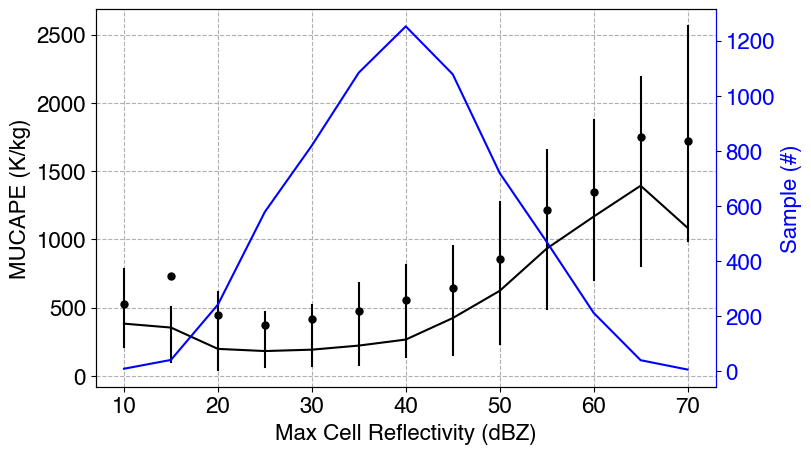

In [19]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
ax1.plot(dbz_bins[:-1], maxdbz_cape_pts[:,1], color='k')
for ibin in range(len(dbz_bins)-1):
    ax1.plot((dbz_bins[ibin],dbz_bins[ibin]), maxdbz_cape_pts[ibin,(0,2)], color='k')
ax1.plot(dbz_bins[:-1], maxdbz_cape_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('Max Cell Reflectivity (dBZ)')
ax1.set_ylabel('MUCAPE (K/kg)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(dbz_bins[:-1], max_dbz_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
# ax2.set_ylim(4, 18)
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

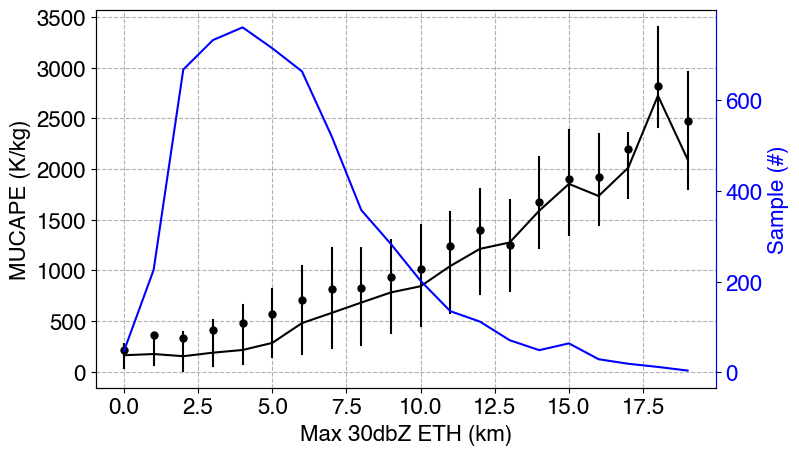

In [20]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
# ax1.errorbar(eth_bins[:-1], maxETH30_cape_pts[:,1], yerr=maxETH30_cape_pts[:,(0,2)].transpose(), color='k')
ax1.plot(eth_bins[:-1], maxETH30_cape_pts[:,1], color='k')
for ibin in range(len(eth_bins)-1):
    ax1.plot((eth_bins[ibin],eth_bins[ibin]), maxETH30_cape_pts[ibin,(0,2)], color='k')
ax1.plot(eth_bins[:-1], maxETH30_cape_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('Max 30dbZ ETH (km)')
ax1.set_ylabel('MUCAPE (K/kg)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(eth_bins[:-1], max_eth30_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
# ax2.set_ylim(4, 18)
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

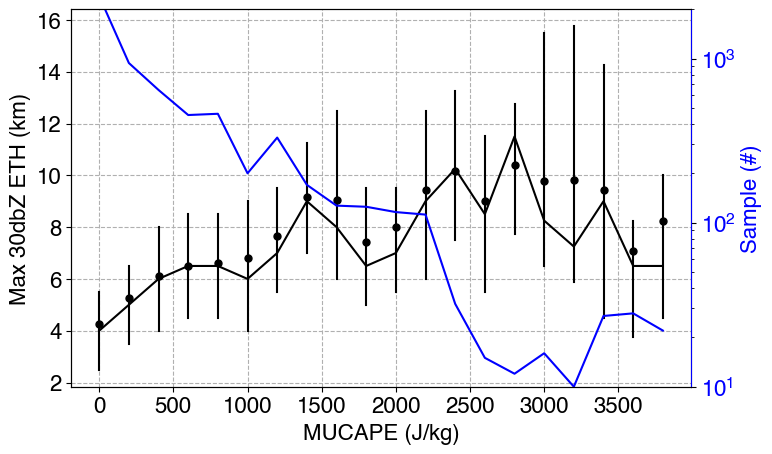

In [21]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(1, 1, figsize=(8, 5), dpi=100)

ax1 = axes
ax1.plot(cape_bins[:-1], cape_maxETH30_pts[:,1], color='k')
for ibin in range(len(cape_bins)-1):
    ax1.plot((cape_bins[ibin],cape_bins[ibin]), cape_maxETH30_pts[ibin,(0,2)], color='k')
ax1.plot(cape_bins[:-1], cape_maxETH30_avg, 'o', color='k', markersize=5)
ax1.set_xlabel('MUCAPE (J/kg)')
ax1.set_ylabel('Max 30dbZ ETH (km)')
ax1.grid(ls='--')

ax2 = ax1.twinx()
ax2.plot(cape_bins[:-1], cape_ns, color='b')
ax2.set_ylabel('Sample (#)', color='b')
ax2.set_ylim(10, 2000)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='b')
ax2.spines['right'].set_color('b')

In [22]:
# Find tracks initiation east of SDC during the day (12PM - 8PM)
# LT = UTC + 3
# Approximate longitude of SDC ridge
lon_SDC = -64.9
lon_eSDC = [-64.9, -63.]
# Day/night hour range in UTC
UTChour_day = [15,22]
UTChour_night = [0,8]

# cape_range1 = [50,500]
# cape_range2 = [500,1500]
# cape_range3 = [1500,4000]
cape_range1 = [50,400]
cape_range2 = [400,900]
cape_range3 = [900,4000]

cell_area1_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range1[0]) & (cape <= cape_range1[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
cell_area2_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range2[0]) & (cape <= cape_range2[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
cell_area3_cape = stats.cell_area.where((start_lon >= lon_SDC) & 
                                        (cape > cape_range3[0]) & (cape <= cape_range3[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
ntracks1_cape = cell_area1_cape.sizes['tracks']
ntracks2_cape = cell_area2_cape.sizes['tracks']
ntracks3_cape = cell_area3_cape.sizes['tracks']
print(f'Number of tracks: {ntracks1_cape}, {ntracks2_cape}, {ntracks3_cape}')

# max_dbz1_cape = stats.max_reflectivity.where((start_lon >= lon_SDC) & 
#                                              (cape > cape_range1[0]) & (cape <= cape_range1[1]) & np.isnan(end_merge_tracknumber), drop=True)

Number of tracks: 1004, 574, 506


(array([0.58087102, 1.08913316, 0.82592598, 0.81685032, 0.61717546,
        0.33581606, 0.18152219, 0.09983721, 0.03630444, 0.00907611]),
 array([1.1383027, 1.3560485, 1.5737942, 1.79154  , 2.0092857, 2.2270315,
        2.4447773, 2.662523 , 2.8802688, 3.0980146, 3.3157604],
       dtype=float32),
 <BarContainer object of 10 artists>)

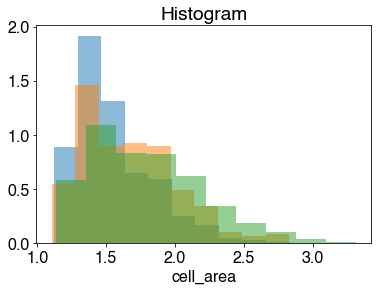

In [23]:
np.log10(cell_area1_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)
np.log10(cell_area2_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)
np.log10(cell_area3_cape.max(dim='times')).plot.hist(density=True, alpha=0.5)

In [24]:
bin_cellarea = np.linspace(1, 3, 20)
bin_maxdbz = np.linspace(10, 70, 20)
bin_ctt = np.linspace(175,280,20)
bin_eth = np.linspace(0,20,21)
bin_cth = np.linspace(0,20,21)
bin_tir = np.linspace(180,300,21)
bin_ctp = np.linspace(80,900,21)

# hist2d_cellarea_maxdbz, bin_cellarea, bin_maxdbz = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxdbz.max(dim='times'), bins=20)
hist2d_cellarea_maxdbz, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_cellarea, bin_maxdbz])
hist2d_minctt_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_temperature_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_ctt, bin_maxdbz])
hist2d_eth20_maxdbz, xbin, ybin = np.histogram2d(stats.maxETH_20dbz.max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_eth, bin_maxdbz])
hist2d_cellarea_eth20, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.maxETH_20dbz.max(dim='times'), bins=[bin_cellarea, bin_eth])
hist2d_maxcth_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_height_max.max(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_cth, bin_maxdbz])
hist2d_mintir_maxdbz, xbin, ybin = np.histogram2d(stats.temperature_ir_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_tir, bin_maxdbz])
hist2d_minctp_maxdbz, xbin, ybin = np.histogram2d(stats.cloud_top_pressure_min.min(dim='times'), stats.maxdbz.max(dim='times'), bins=[bin_tir, bin_maxdbz])

hist2d_cellarea_maxcth, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_height_max.max(dim='times'), bins=[bin_cellarea, bin_cth])
hist2d_cellarea_minctt, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_temperature_min.min(dim='times'), bins=[bin_cellarea, bin_ctt])
hist2d_cellarea_mintir, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.temperature_ir_min.min(dim='times'), bins=[bin_cellarea, bin_tir])
hist2d_cellarea_minctp, xbin, ybin = np.histogram2d(np.log10(stats.cell_area).max(dim='times'), stats.cloud_top_pressure_min.min(dim='times'), bins=[bin_cellarea, bin_ctp])

In [25]:
def plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=None):

    mpl.rcParams['font.size'] = 13
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=100)

    for row in range(2):
        for col in range(2):
            ax = axes[row, col]
            Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            # Normalize colormap
            if normal is not None:
                norm = mpl.colors.LogNorm(vmin=Zm.min(), vmax=Zm.max())
            else:
                norm = None
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
#             ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

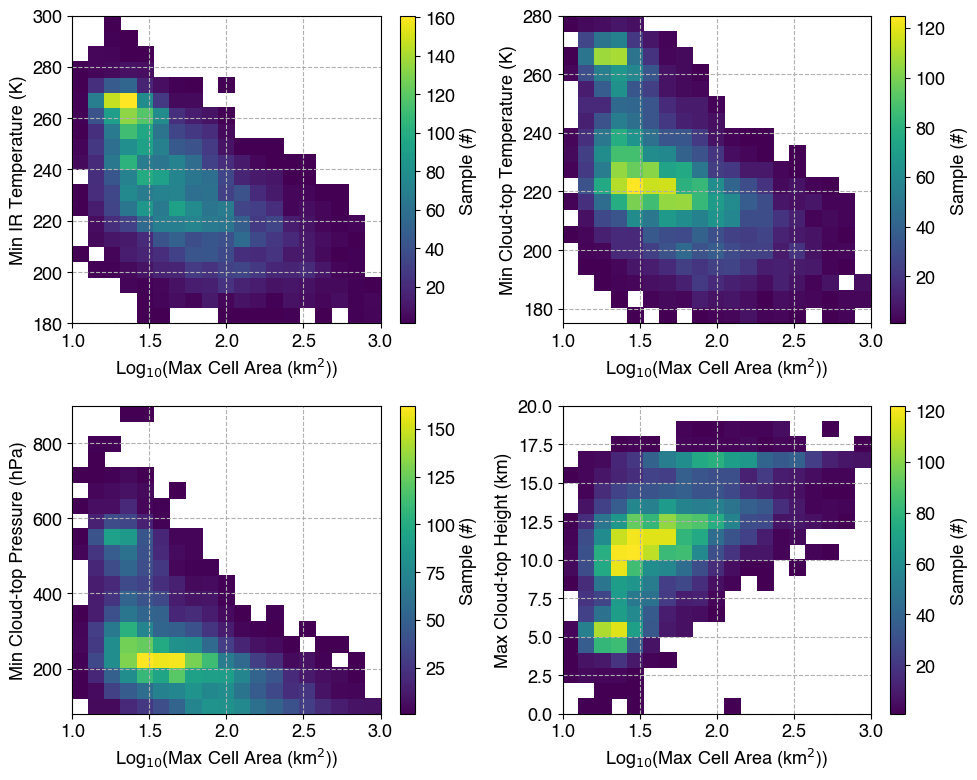

In [26]:
data_arr = [[hist2d_cellarea_mintir.transpose(), hist2d_cellarea_minctt.transpose()], 
            [hist2d_cellarea_minctp.transpose(), hist2d_cellarea_maxcth.transpose(), ]]
xbins = [[bin_cellarea, bin_cellarea], [bin_cellarea, bin_cellarea]]
ybins = [[bin_tir, bin_ctt],[bin_ctp, bin_cth]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min IR Temperature (K)', 'Min Cloud-top Temperature (K)'], ['Min Cloud-top Pressure (hPa)', 'Max Cloud-top Height (km)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxCellArea_vs_GOESCloudTopStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxCellArea_vs_GOESCloudTopStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

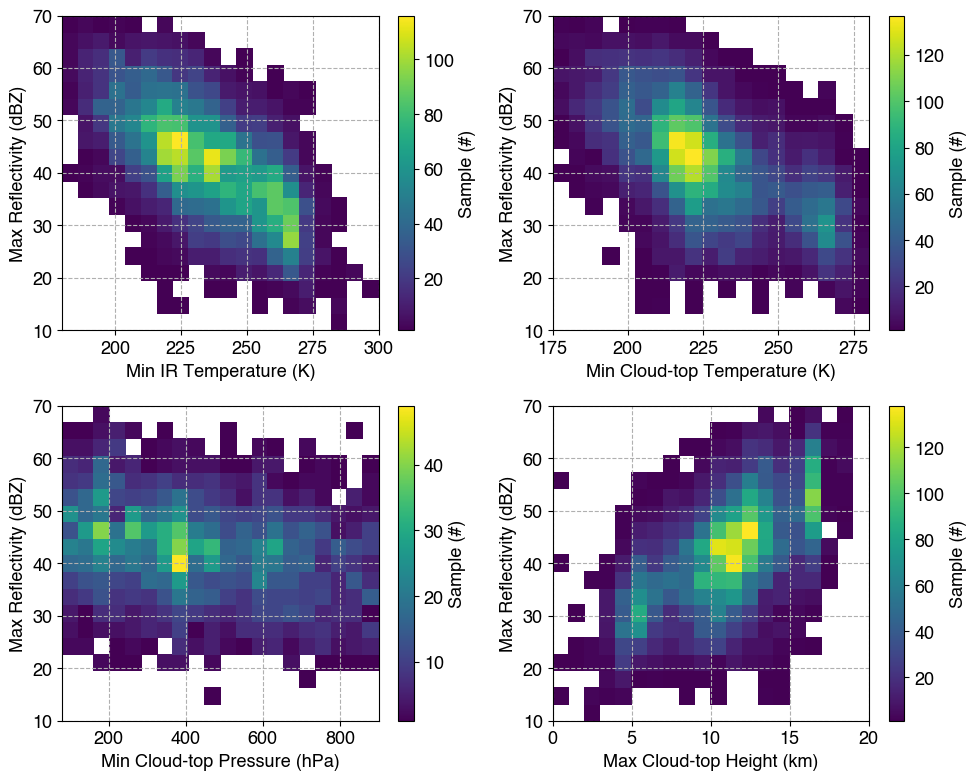

In [27]:
data_arr = [[hist2d_mintir_maxdbz.transpose(), hist2d_minctt_maxdbz.transpose()], 
            [hist2d_minctp_maxdbz.transpose(), hist2d_maxcth_maxdbz.transpose(), ]]
xbins = [[bin_tir, bin_ctt],[bin_ctp, bin_cth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Min IR Temperature (K)', 'Min Cloud-top Temperature (K)'], ['Min Cloud-top Pressure (hPa)', 'Max Cloud-top Height (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_GOESCloudTopStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

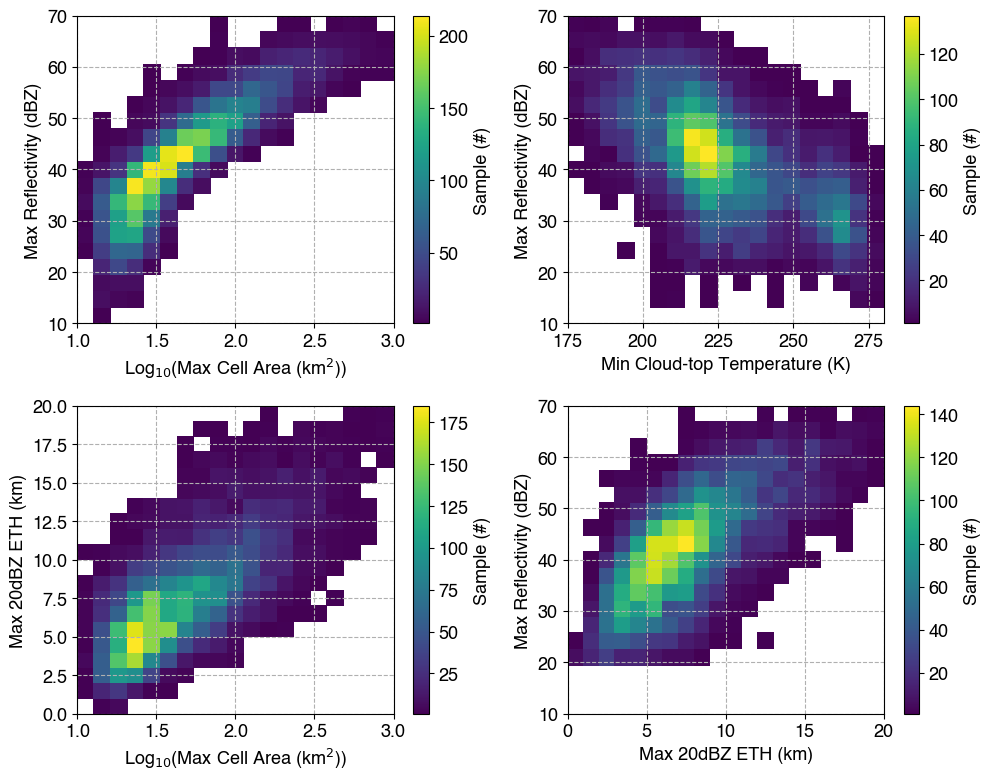

In [28]:
data_arr = [[hist2d_cellarea_maxdbz.transpose(), hist2d_minctt_maxdbz.transpose()], 
            [hist2d_cellarea_eth20.transpose(), hist2d_eth20_maxdbz.transpose(), ]]
xbins = [[bin_cellarea, bin_ctt],[bin_cellarea, bin_eth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_eth, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Min Cloud-top Temperature (K)'], ['Log$_{10}$(Max Cell Area (km$^2$))', 'Max 20dBZ ETH (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max 20dBZ ETH (km)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

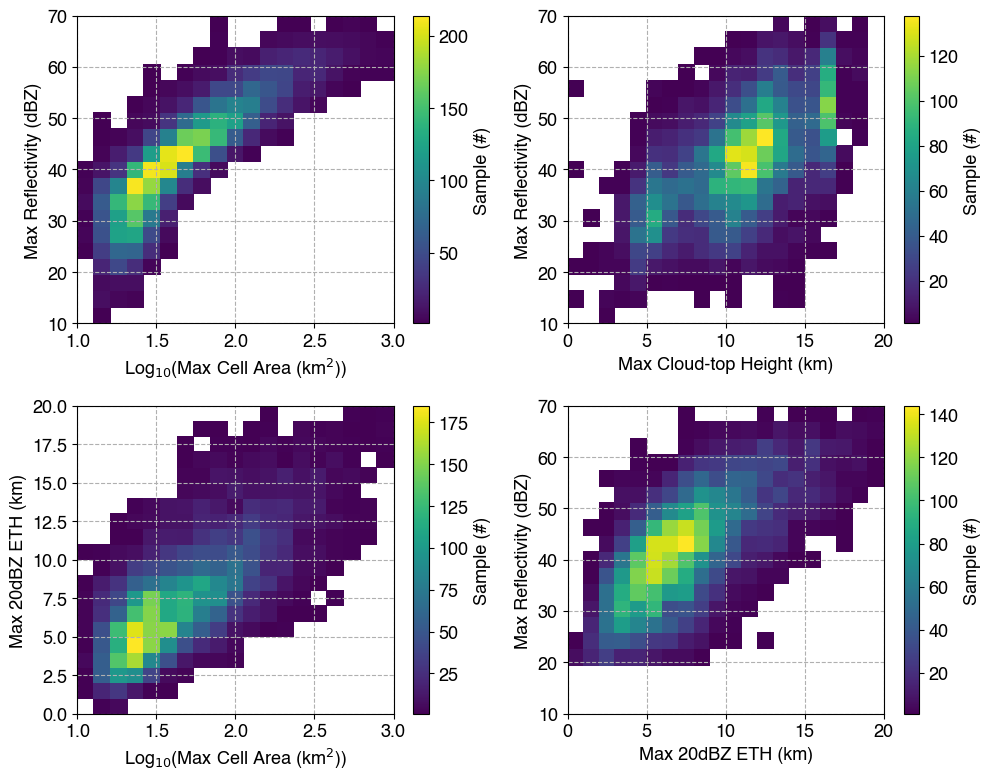

In [29]:
data_arr = [[hist2d_cellarea_maxdbz.transpose(), hist2d_maxcth_maxdbz.transpose()], 
            [hist2d_cellarea_eth20.transpose(), hist2d_eth20_maxdbz.transpose(), ]]
xbins = [[bin_cellarea, bin_cth],[bin_cellarea, bin_eth]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_eth, bin_maxdbz]]
cmap = 'viridis'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Max Cloud-top Height (km)'], ['Log$_{10}$(Max Cell Area (km$^2$))', 'Max 20dBZ ETH (km)']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], ['Max 20dBZ ETH (km)', 'Max Reflectivity (dBZ)']]
titles = [[''], []]
cblabels = [['Sample (#)', 'Sample (#)'], ['Sample (#)', 'Sample (#)']]
figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats2.png'
fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname)
# figname = f'{figdir_jointhist}JointHist_MaxDBZ_vs_CellStats_LogScale.png'
# fig = plot_jointhist_4panel(data_arr, xbins, ybins, cmap, xlabels, ylabels, titles, cblabels, figname, normal=True)

In [30]:
def quantiles1d_by2cond(in_var, x_cond_var, x_cond_range, y_cond_var, y_cond_range, 
                       loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles, min_nsample=5):
    nbins_x = len(x_cond_range)-1
    nbins_y = len(y_cond_range)-1
    npts = len(quantiles)
    out_var_pts = np.full((npts, nbins_y, nbins_x), np.nan, dtype=np.float)
    out_var_avg = np.full((nbins_y, nbins_x), np.nan, dtype=np.float)
    nsamples = np.full((nbins_y, nbins_x), 0, dtype=np.int32)
    # Loop over two conditional variable bins
    for xbin in range(nbins_x):
        for ybin in range(nbins_y):
#             in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
#                                        (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
#                                        (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]) &
#                                        (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)
            in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                       (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
                                       (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]), drop=True)
            nsamples[ybin, xbin] = in_var_cond.sizes['tracks']
            if nsamples[ybin, xbin] >= min_nsample:
                out_var_pts[:, ybin, xbin] = in_var_cond.quantile(quantiles, dim='tracks', skipna=True).values
                out_var_avg[ybin, xbin] = in_var_cond.mean(dim='tracks').values
    return (nsamples, out_var_pts, out_var_avg)

In [31]:
def quantiles2d_by2cond(in_var, x_cond_var, x_cond_range, y_cond_var, y_cond_range, 
                       loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles, min_nsample=5):
    nbins_x = len(x_cond_range)-1
    nbins_y = len(y_cond_range)-1
    npts = len(quantiles)
    out_var_pts = np.full((npts, nbins_y, nbins_x), np.nan, dtype=np.float)
    out_var_avg = np.full((nbins_y, nbins_x), np.nan, dtype=np.float)
    nsamples = np.full((nbins_y, nbins_x), 0, dtype=np.int32)
#     print(nsamples.shape)
    # Loop over two conditional variable bins
    for xbin in range(nbins_x):
        for ybin in range(nbins_y):
#             print(xbin, ybin)
#             in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
#                                        (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
#                                        (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]) &
#                                        (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)
            in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                       (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
                                       (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]), drop=True)
            nsamples[ybin, xbin] = in_var_cond.sizes['tracks']
            if nsamples[ybin, xbin] >= min_nsample:
                out_var_pts[:, ybin, xbin] = in_var_cond.max(dim='times').quantile(quantiles, dim='tracks', skipna=True).values
                out_var_avg[ybin, xbin] = in_var_cond.max(dim='times').mean(dim='tracks').values
    return (nsamples, out_var_pts, out_var_avg)

In [32]:
2 * np.sqrt(3**10 / np.pi)

274.1961376042096

In [69]:
quantiles_2d = [0.25,0.5,0.75,0.9,0.95]

# Calculate single environment parameter stats as joint functions of cell statistics
# Get lifetime max cell statistics
max_cellarea_lifetime = np.log10(stats.cell_area).max(dim='times')
max_dbz_lifetime = stats.maxdbz.max(dim='times')
max_eth20_lifetime = stats.maxETH_20dbz.max(dim='times')
max_eth30_lifetime = stats.maxETH_30dbz.max(dim='times')
min_ctt_lifetime = stats.cloud_top_temperature_min.min(dim='times')

# Set min number of samples in each bin
min_ns = 5
nsamples_cellareamaxdbz, cape_cellareamaxdbz_pts, cape_cellareamaxdbz_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lnb_z_cellareamaxdbz_pts, lnb_z_cellareamaxdbz_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, cin_cellareamaxdbz_pts, cin_cellareamaxdbz_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lfc_z_cellareamaxdbz_pts, lfc_z_cellareamaxdbz_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, lpl_z_cellareamaxdbz_pts, lpl_z_cellareamaxdbz_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, q850p_cellareamaxdbz_pts, q850p_cellareamaxdbz_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, q700p_cellareamaxdbz_pts, q700p_cellareamaxdbz_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, rh700p_cellareamaxdbz_pts, rh700p_cellareamaxdbz_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareamaxdbz, rh500p_cellareamaxdbz_pts, rh500p_cellareamaxdbz_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, max_dbz_lifetime, bin_maxdbz, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

In [70]:
nsamples_cellareaeth20, cape_cellareaeth20_pts, cape_cellareaeth20_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lnb_z_cellareaeth20_pts, lnb_z_cellareaeth20_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, cin_cellareaeth20_pts, cin_cellareaeth20_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lfc_z_cellareaeth20_pts, lfc_z_cellareaeth20_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, lpl_z_cellareaeth20_pts, lpl_z_cellareaeth20_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, q850p_cellareaeth20_pts, q850p_cellareaeth20_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, q700p_cellareaeth20_pts, q700p_cellareaeth20_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, rh700p_cellareaeth20_pts, rh700p_cellareaeth20_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareaeth20, rh500p_cellareaeth20_pts, rh500p_cellareaeth20_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, max_eth20_lifetime, bin_eth, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [71]:
nsamples_cellareactt, cape_cellareactt_pts, cape_cellareactt_avg = quantiles1d_by2cond(cape, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lnb_z_cellareactt_pts, lnb_z_cellareactt_avg = quantiles1d_by2cond(lnb_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, cin_cellareactt_pts, cin_cellareactt_avg = quantiles1d_by2cond(cin, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lfc_z_cellareactt_pts, lfc_z_cellareactt_avg = quantiles1d_by2cond(lfc_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, lpl_z_cellareactt_pts, lpl_z_cellareactt_avg = quantiles1d_by2cond(lpl_z, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, q850p_cellareactt_pts, q850p_cellareactt_avg = quantiles1d_by2cond(q850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, q700p_cellareactt_pts, q700p_cellareactt_avg = quantiles1d_by2cond(q700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, rh700p_cellareactt_pts, rh700p_cellareactt_avg = quantiles1d_by2cond(rh700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, rh500p_cellareactt_pts, rh500p_cellareactt_avg = quantiles1d_by2cond(rh500p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/Users/feng045/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [72]:
nsamples_cellareactt, shear3mag_cellareactt_pts, shear3mag_cellareactt_avg = quantiles1d_by2cond(shear3mag, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, shear6mag_cellareactt_pts, shear6mag_cellareactt_avg = quantiles1d_by2cond(shear6mag, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, u700p_cellareactt_pts, u700p_cellareactt_avg = quantiles1d_by2cond(u700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, v700p_cellareactt_pts, v700p_cellareactt_avg = quantiles1d_by2cond(v700p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, u850p_cellareactt_pts, u850p_cellareactt_avg = quantiles1d_by2cond(u850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

nsamples_cellareactt, v850p_cellareactt_pts, v850p_cellareactt_avg = quantiles1d_by2cond(v850p, max_cellarea_lifetime, bin_cellarea, min_ctt_lifetime, bin_ctt, 
                                                                            start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d, min_nsample=min_ns)

In [73]:
def plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=100)

    for row in range(2):
        for col in range(2):
            ax = axes[row, col]
            Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            # Normalize colormap
            cmap = plt.get_cmap(cmap)
            norm = mpl.colors.BoundaryNorm(levels[row][col], ncolors=cmap.N)
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
#             cnt = ax.contour(xbins[row][col][:-1], ybins[row][col][:-1], nsample_arr, levels=levels_ct, colors='g')
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
            ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

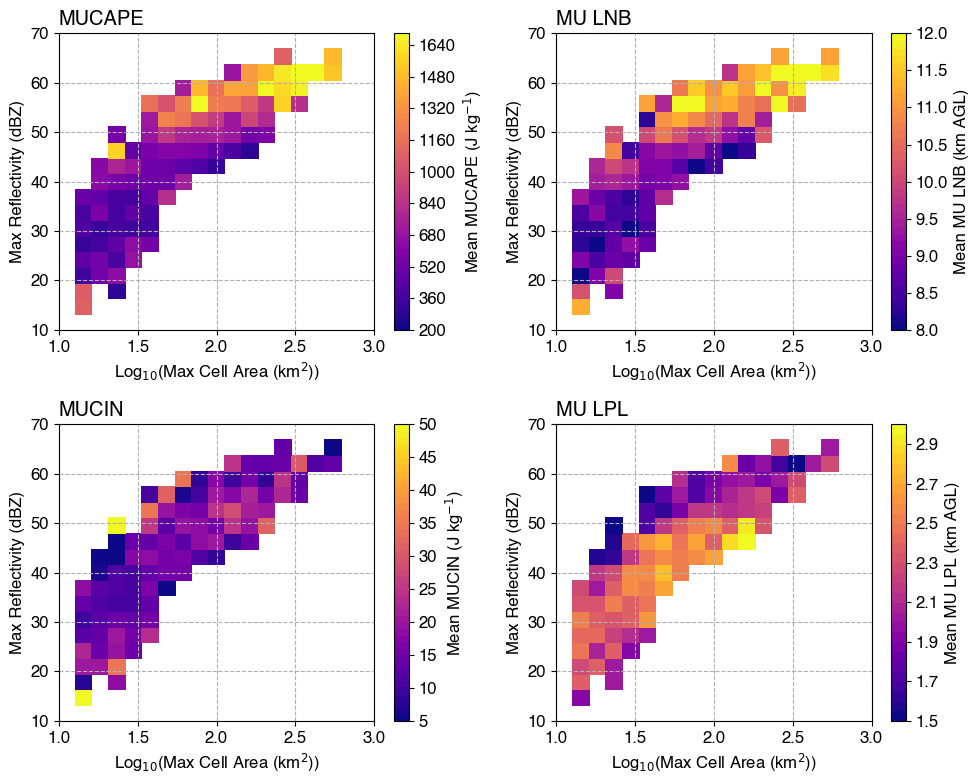

In [74]:
data_arr = [[cape_cellareamaxdbz_avg, lnb_z_cellareamaxdbz_avg], 
            [cin_cellareamaxdbz_avg, lpl_z_cellareamaxdbz_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
levels = [[np.arange(200,1701,10), np.arange(8,12.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
levels_ct = [min_ns, 10,20,50,100,200]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], 
           ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MaxDBZ.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

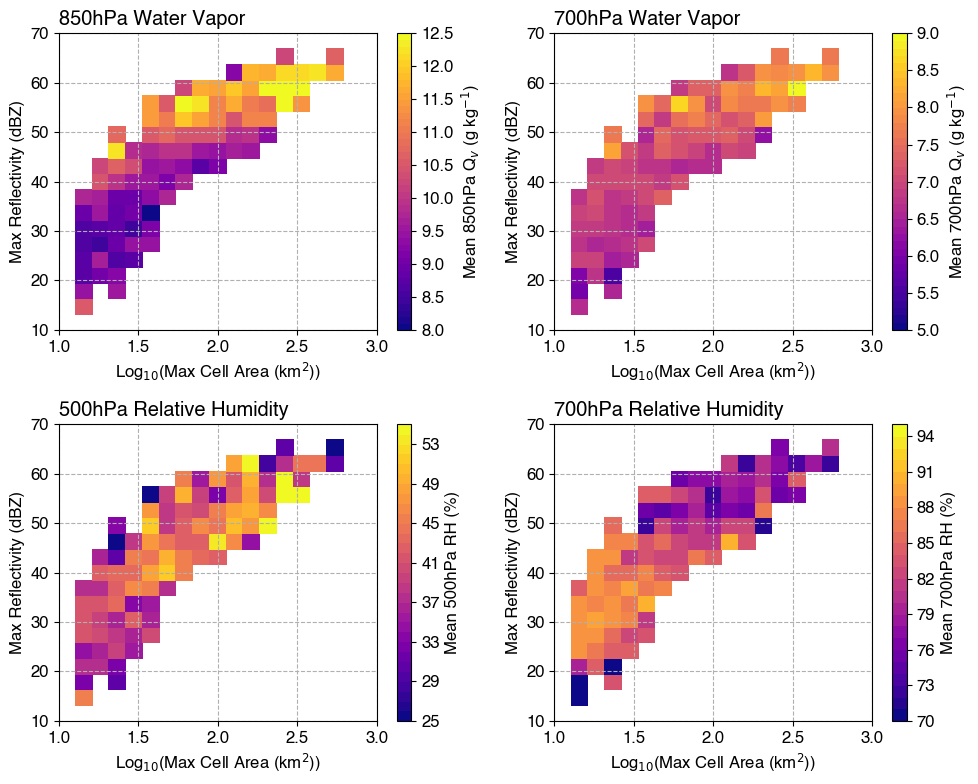

In [75]:
data_arr = [[q850p_cellareamaxdbz_avg, q700p_cellareamaxdbz_avg], 
            [rh500p_cellareamaxdbz_avg, rh700p_cellareamaxdbz_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_maxdbz, bin_maxdbz], [bin_maxdbz, bin_maxdbz]]
levels = [[np.arange(8, 12.51, 0.1), np.arange(5, 9.01, 0.1)], 
          [np.arange(25, 55.1, 1), np.arange(70, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)'], 
           ['Max Reflectivity (dBZ)', 'Max Reflectivity (dBZ)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MaxDBZ.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

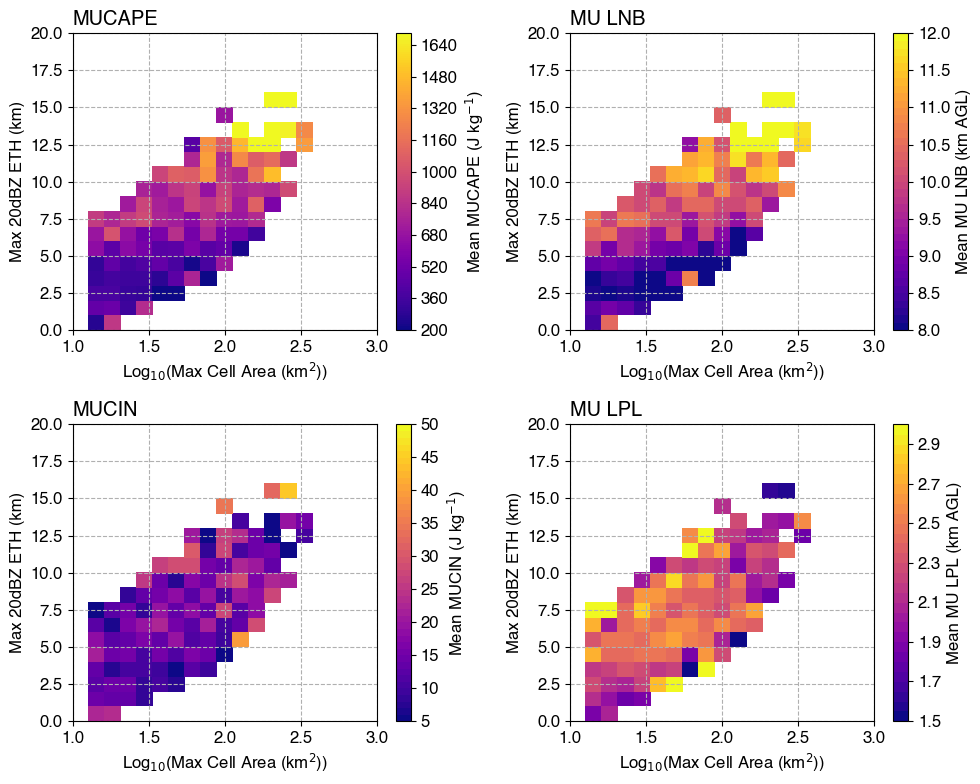

In [76]:
data_arr = [[cape_cellareaeth20_avg, lnb_z_cellareaeth20_avg], 
            [cin_cellareaeth20_avg, lpl_z_cellareaeth20_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_eth, bin_eth], [bin_eth, bin_eth]]
levels = [[np.arange(200,1701,10), np.arange(8,12.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)'], 
           ['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MaxETH20.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

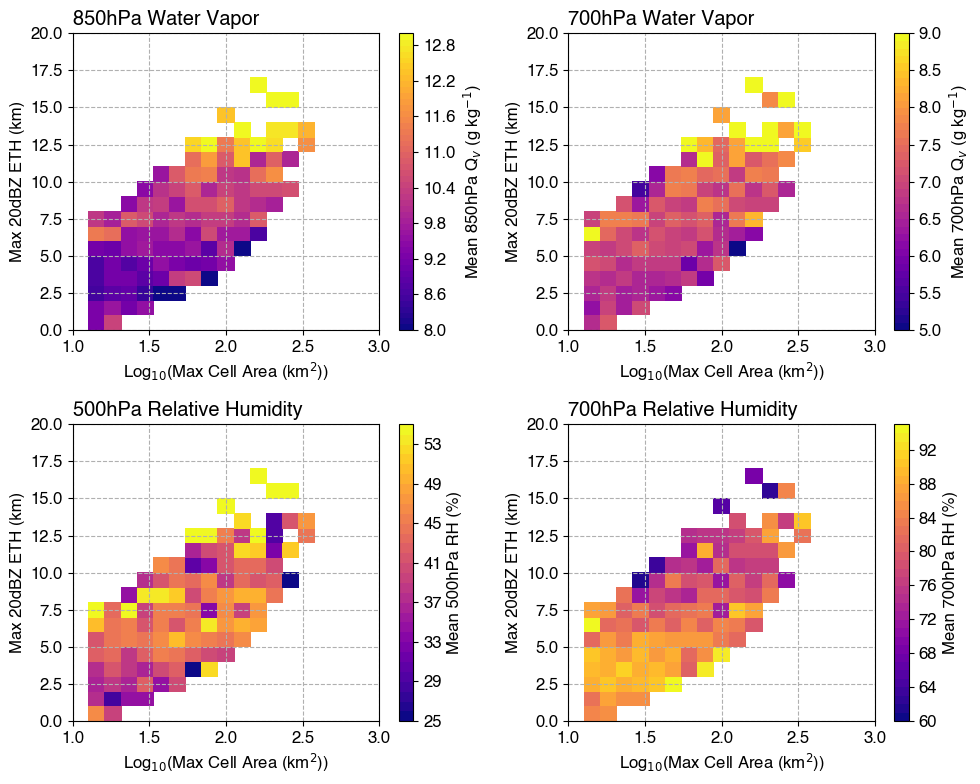

In [77]:
data_arr = [[q850p_cellareaeth20_avg, q700p_cellareaeth20_avg], 
            [rh500p_cellareaeth20_avg, rh700p_cellareaeth20_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_eth, bin_eth], [bin_eth, bin_eth]]
levels = [[np.arange(8, 13.01, 0.1), np.arange(5, 9.01, 0.1)], 
          [np.arange(25, 55.1, 1), np.arange(60, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)'], 
           ['Max 20dBZ ETH (km)', 'Max 20dBZ ETH (km)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MaxETH20.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

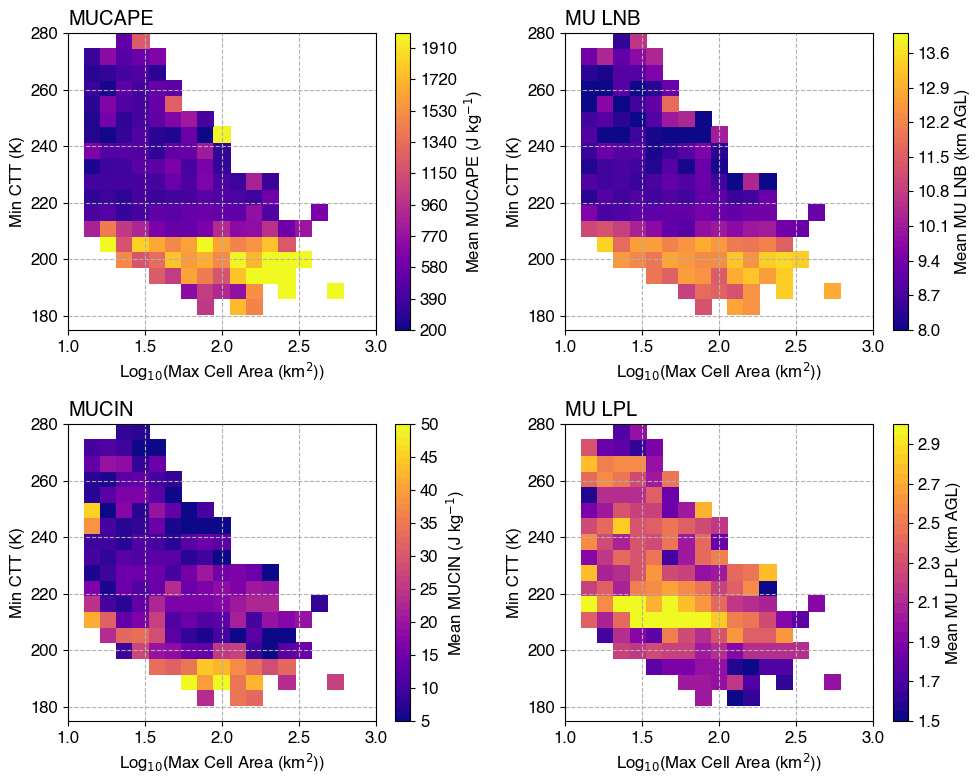

In [78]:
data_arr = [[cape_cellareactt_avg, lnb_z_cellareactt_avg], 
            [cin_cellareactt_avg, lpl_z_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(200,2001,10), np.arange(8,14.1,0.1)], 
          [np.arange(5,50.1,1), np.arange(1.5, 3.01, 0.05)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['MUCAPE', 'MU LNB'], ['MUCIN', 'MU LPL']]
cblabels = [['Mean MUCAPE (J kg$^{-1}$)', 'Mean MU LNB (km AGL)'], 
            ['Mean MUCIN (J kg$^{-1}$)', 'Mean MU LPL (km AGL)']]
figname = f'{figdir_jointhist}ParcelStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

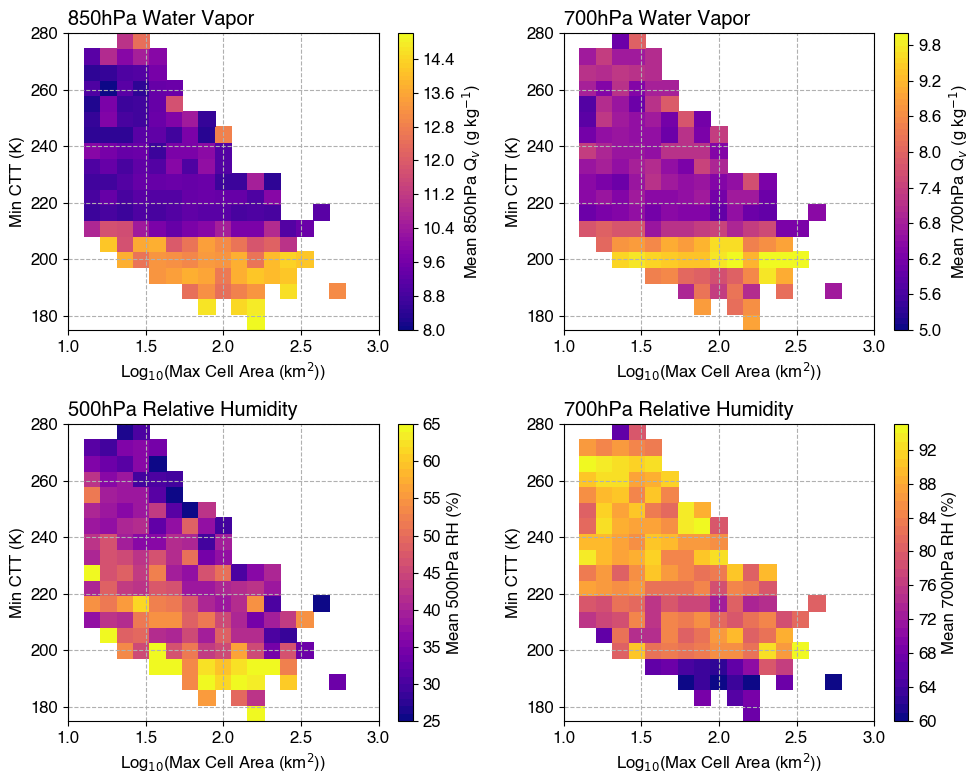

In [79]:
data_arr = [[q850p_cellareactt_avg, q700p_cellareactt_avg], 
            [rh500p_cellareactt_avg, rh700p_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(8, 15.01, 0.1), np.arange(5, 10.01, 0.1)], 
          [np.arange(25, 65.1, 1), np.arange(60, 95.01, 1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['850hPa Water Vapor', '700hPa Water Vapor'], ['500hPa Relative Humidity', '700hPa Relative Humidity']]
cblabels = [['Mean 850hPa Q$_v$ (g kg$^{-1}$)', 'Mean 700hPa Q$_v$ (g kg$^{-1}$)'], 
            ['Mean 500hPa RH (%)', 'Mean 700hPa RH (%)']]
figname = f'{figdir_jointhist}HumidityStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_4panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

In [80]:
def plot_filledjointhist_6panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(3, 2, figsize=(10, 12), dpi=100)

    for row in range(3):
        for col in range(2):
            ax = axes[row, col]
#             Zm = np.ma.masked_where(data_arr[row][col] <= 0, data_arr[row][col])
            Zm = np.ma.masked_invalid(data_arr[row][col])
            # Normalize colormap
            cmap = plt.get_cmap(cmap)
            norm = mpl.colors.BoundaryNorm(levels[row][col], ncolors=cmap.N)
            pcm = ax.pcolormesh(xbins[row][col], ybins[row][col], Zm, norm=norm, cmap=cmap)
            cb = plt.colorbar(pcm, ax=ax, label=cblabels[row][col])
            ax.grid(ls='--')
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel(ylabels[row][col])
            ax.set_title(titles[row][col], loc='left')
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

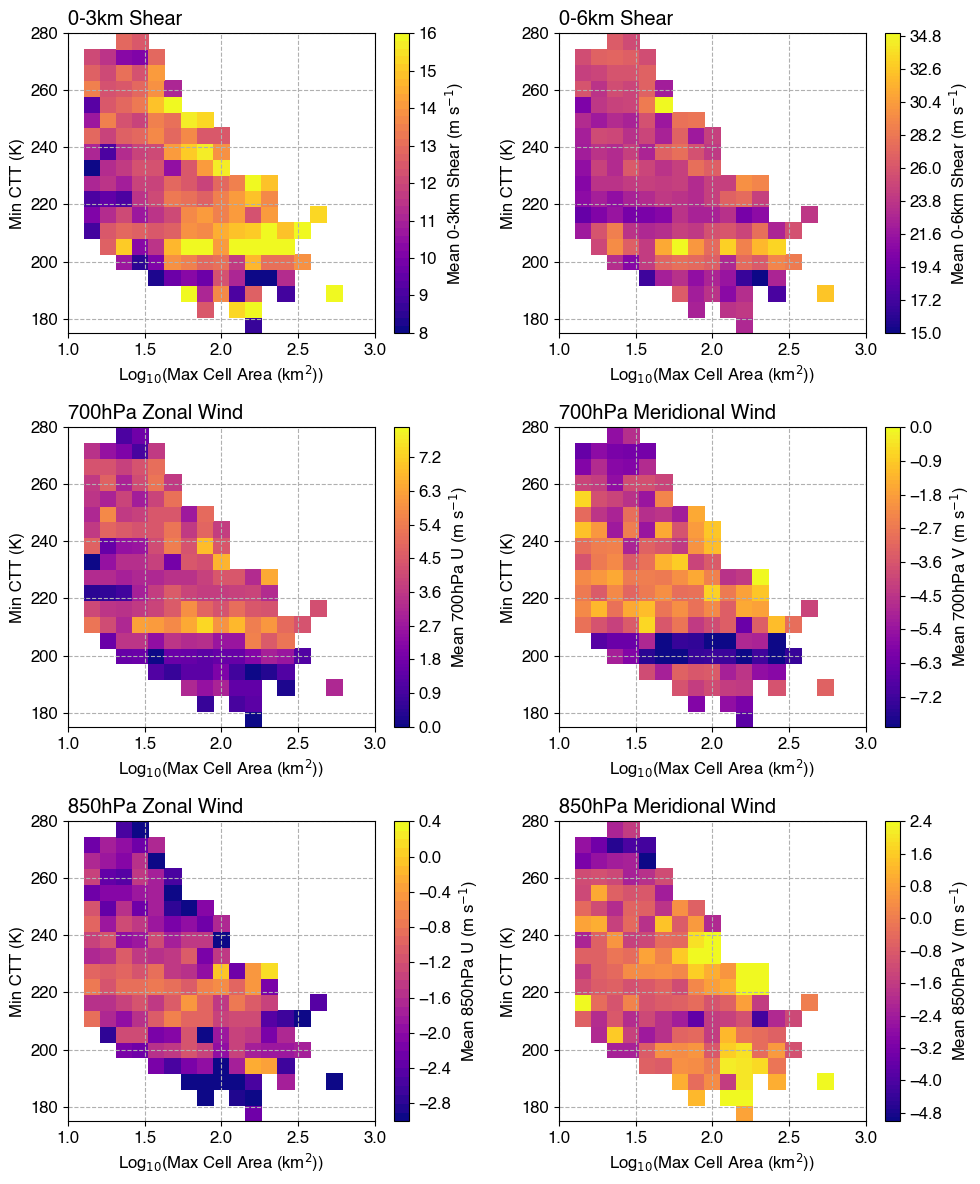

In [81]:
data_arr = [[shear3mag_cellareactt_avg, shear6mag_cellareactt_avg], 
            [u700p_cellareactt_avg, v700p_cellareactt_avg],
            [u850p_cellareactt_avg, v850p_cellareactt_avg]]
xbins = [[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea],[bin_cellarea, bin_cellarea]]
ybins = [[bin_ctt, bin_ctt], [bin_ctt, bin_ctt], [bin_ctt, bin_ctt]]
levels = [[np.arange(8, 16.01, 0.2), np.arange(15, 35.01, 0.2)], 
          [np.arange(0, 8.1, 0.1), np.arange(-8.0, 0.01, 0.1)],
          [np.arange(-3, 0.5, 0.1), np.arange(-5, 2.5, 0.1)]]
cmap = 'plasma'
xlabels = [['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'], 
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))'],
           ['Log$_{10}$(Max Cell Area (km$^2$))', 'Log$_{10}$(Max Cell Area (km$^2$))']]
ylabels = [['Min CTT (K)', 'Min CTT (K)'], 
           ['Min CTT (K)', 'Min CTT (K)'],
           ['Min CTT (K)', 'Min CTT (K)']]
titles = [['0-3km Shear', '0-6km Shear'], 
          ['700hPa Zonal Wind', '700hPa Meridional Wind'],
          ['850hPa Zonal Wind', '850hPa Meridional Wind']]
cblabels = [['Mean 0-3km Shear (m s$^{-1}$)', 'Mean 0-6km Shear (m s$^{-1}$)'], 
            ['Mean 700hPa U (m s$^{-1}$)', 'Mean 700hPa V (m s$^{-1}$)'],
            ['Mean 850hPa U (m s$^{-1}$)', 'Mean 850hPa V (m s$^{-1}$)']]
figname = f'{figdir_jointhist}WindStats_MaxArea+MinCTT.png'
fig = plot_filledjointhist_6panel(data_arr, xbins, ybins, levels, cmap, xlabels, ylabels, titles, cblabels, figname)

In [52]:
# Find equal sample number bin values by quantiles
# quantile_bins = np.arange(0,1.01,0.2).tolist()
quantile_bins = [0,0.33,0.66,1]
# cape_qcut, cape_bins = pd.qcut(cape, 5, retbins=True)
cape_qcut, cape_bins = pd.qcut(cape, quantile_bins, retbins=True)
shear6mag_qcut, shear6mag_bins = pd.qcut(shear6mag, quantile_bins, retbins=True)
cape_bins = np.array(cape_bins)
shear6mag_bins = np.array(shear6mag_bins)
print(cape_bins)

# quantiles_2d = [0.25,0.5,0.75,0.9,0.95]
# cape_range = [50,400,900,4000]
# shear6mag_range = [0,20,28,50]
cape_range = cape_bins
shear6mag_range = shear6mag_bins

nsamples_capeshear6mag, lifetime_capeshear6mag_pts, lifetime_capeshear6mag_avg = quantiles1d_by2cond(lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, cell_area_capeshear6mag_pts, cell_area_capeshear6mag_avg = quantiles2d_by2cond(stats.cell_area, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, minctt_capeshear6mag_pts, minctt_capeshear6mag_avg = quantiles1d_by2cond(min_ctt_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, max_dbz_capeshear6mag_pts, max_dbz_capeshear6mag_avg = quantiles1d_by2cond(max_dbz_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

nsamples_capeshear6mag, max_eth30_capeshear6mag_pts, max_eth30_capeshear6mag_avg = quantiles1d_by2cond(max_eth30_lifetime, cape, cape_range, shear6mag, shear6mag_range,
                                                                          start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_2d)

[2.08569132e-02 1.76195847e+02 6.78261907e+02 6.06525781e+03]


In [53]:
def plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname):

    mpl.rcParams['font.size'] = 12
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(1, 1, figsize=(6, 5), dpi=150)

    ax1 = axes
    # plt.pcolormesh(cape_range, shear6mag_range, np.log10(cell_area_capeshear6mag_pts[idx,:,:]))
    pcm1 = ax1.pcolormesh(data_arr, cmap=cmap)
    # pcm1 = ax1.pcolormesh((cell_area_capeshear6mag_pts[idx,:,:]))
    cb1 = plt.colorbar(pcm1, ax=ax1, label=cblabel)
    ax1.set_xticks(np.arange(len(ticklabels)))
    ax1.set_yticks(np.arange(len(ticklabels)))
    ax1.set_xticklabels(ticklabels)
    ax1.set_yticklabels(ticklabels)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    for (i, j), z in np.ndenumerate(sample_arr):
        ax1.text(j+0.5, i+0.5, '{:0.0f}'.format(z), ha='center', va='center', color='white', fontsize=10)
    ax1.set_title(title, loc='left')
    ax1.text(0.02, 0.04, f'Sample (#)', ha='left', color='white', transform=ax1.transAxes, fontsize=10)
    
    fig.tight_layout()
#     fig.savefig(figname, bbox_inches='tight', dpi=300)
    
    return fig

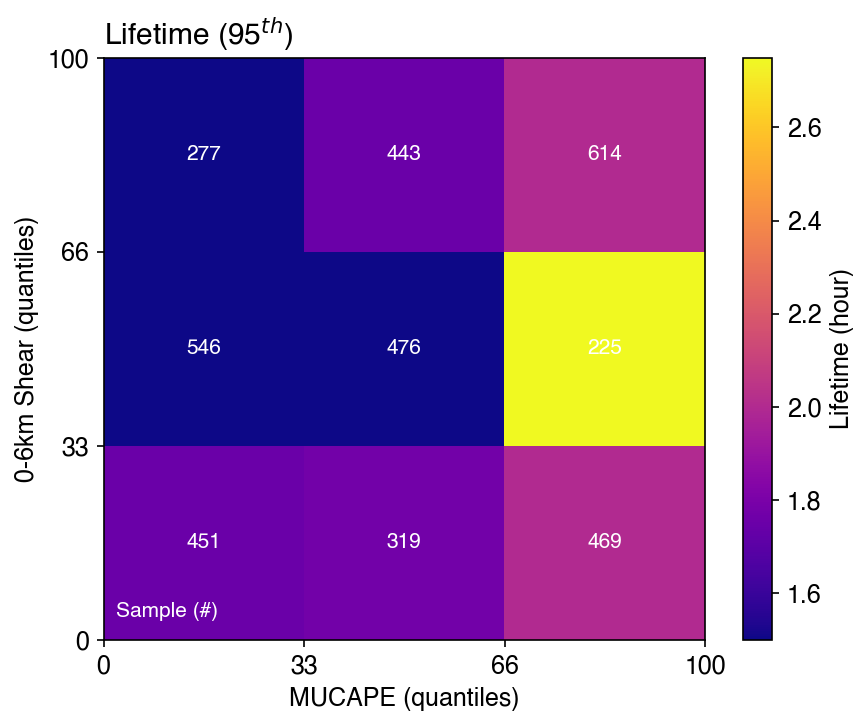

In [54]:
qntl = 0.95
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = lifetime_capeshear6mag_pts[idx,:,:]
# data_arr = lifetime_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Lifetime (hour)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
title = f'Lifetime ({qntl*100:.0f}'+'$^{th}$)'
figname = f'{figdir}celllifetime_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

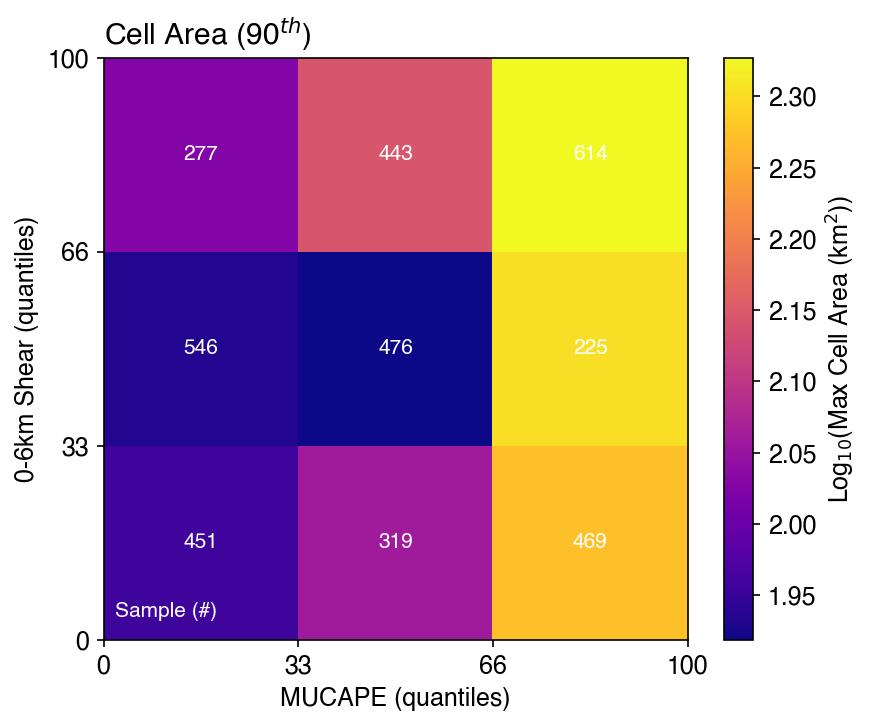

In [55]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = np.log10(cell_area_capeshear6mag_pts[idx,:,:])
# data_arr = cell_area_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Log$_{10}$(Max Cell Area (km$^2$))'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
title = f'Cell Area ({qntl*100:.0f}'+'$^{th}$)'
figname = f'{figdir}cellarea_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

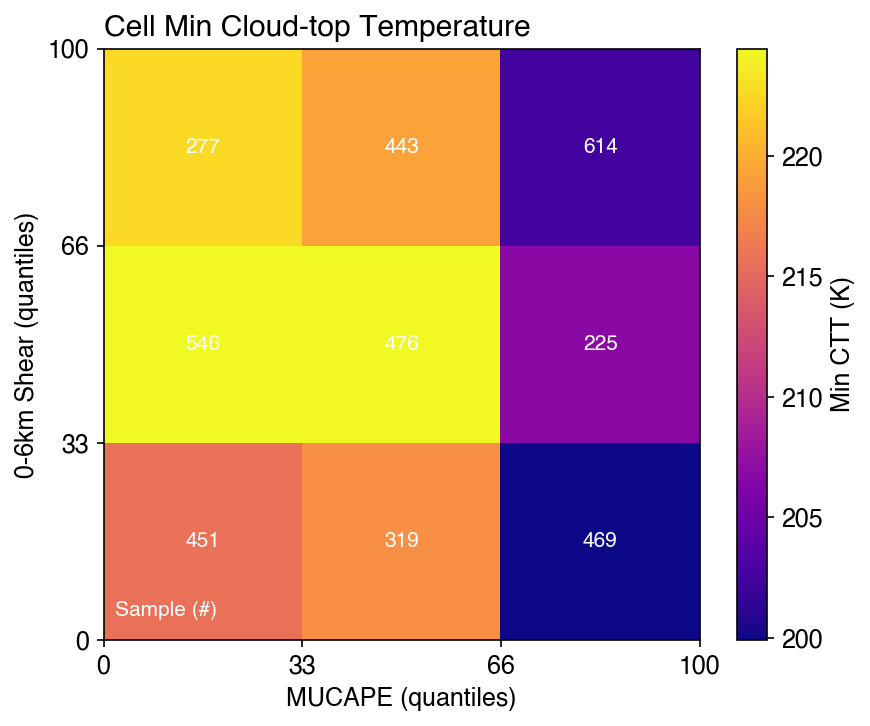

In [56]:
qntl = 0.25
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = minctt_capeshear6mag_pts[idx,:,:]
# data_arr = minctt_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Min CTT (K)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Min Cloud-top Temperature'
figname = f'{figdir}CellMinCTT_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

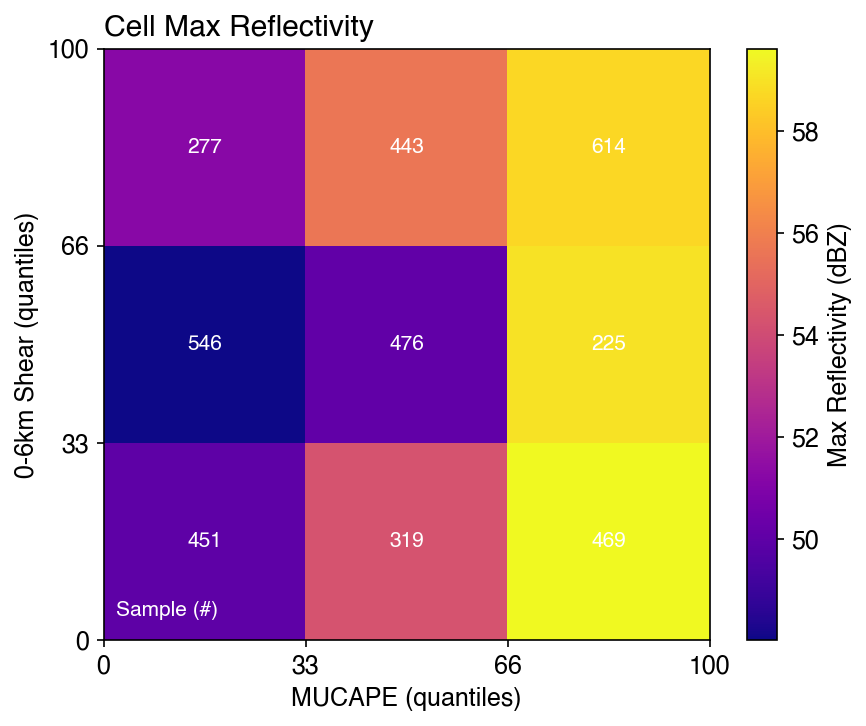

In [57]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = max_dbz_capeshear6mag_pts[idx,:,:]
# data_arr = minctt_capeshear6mag_avg
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Max Reflectivity (dBZ)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Max Reflectivity'
figname = f'{figdir}CellMaxDBZ_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

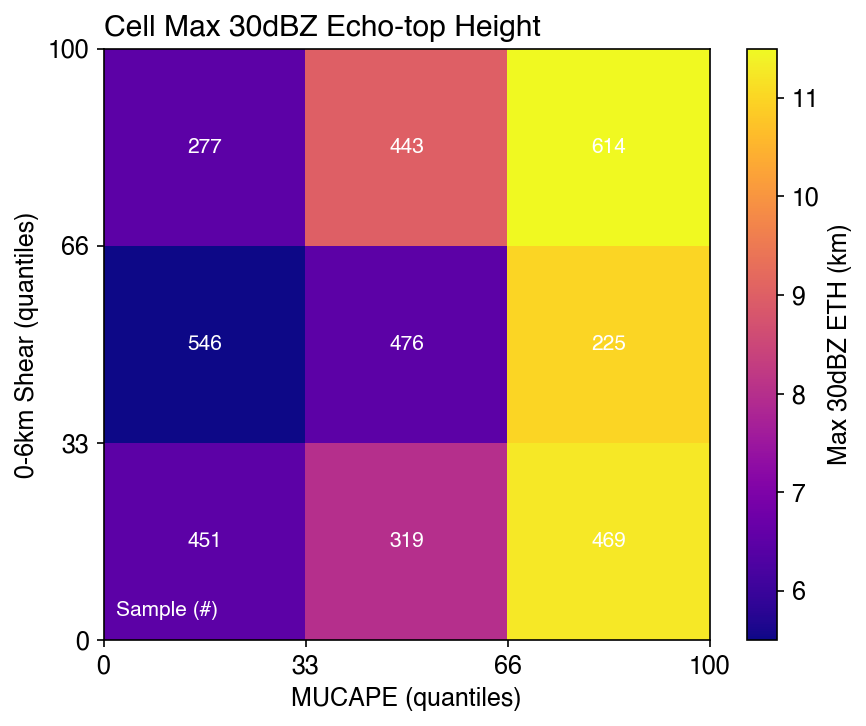

In [58]:
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
data_arr = max_eth30_capeshear6mag_pts[idx,:,:]
sample_arr = nsamples_capeshear6mag
ticklabels = (np.array(quantile_bins)*100).astype(int)
cblabel = 'Max 30dBZ ETH (km)'
cmap = 'plasma'
xlabel = 'MUCAPE (quantiles)'
ylabel = '0-6km Shear (quantiles)'
# title = f'Min CTT ({qntl*100:.0f}'+'$^{th}$)'
title = f'Cell Max 30dBZ Echo-top Height'
figname = f'{figdir}CellMaxETH30dBZ_filledjointhist_MUCAPE_Shear0-6km.png'
fig = plot_filledjointhist(data_arr, sample_arr, qntl, ticklabels, xlabel, ylabel, title, cblabel, figname)

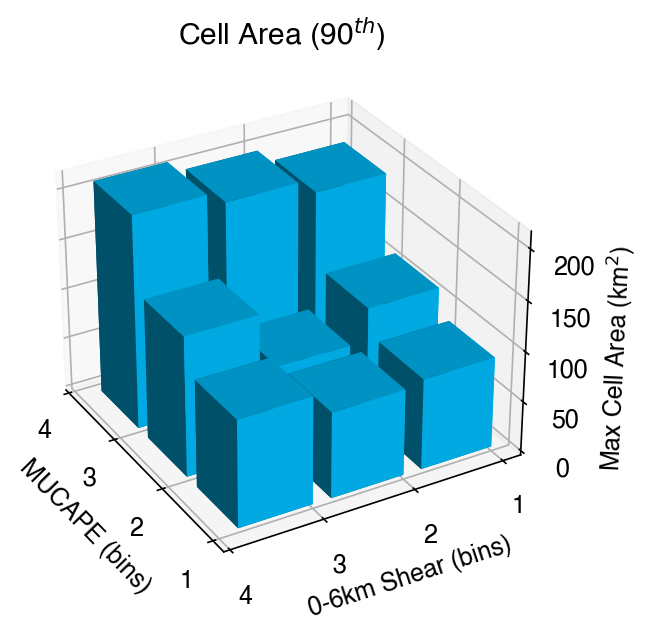

In [59]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# top = nsamples_capeshear6mag.ravel()
qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = cell_area_capeshear6mag_pts[idx,:,:].ravel()
# top = cell_area_capeshear6mag_avg.ravel()
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='deepskyblue')
ax1.view_init(30, 150)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max Cell Area (km$^2$)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Area ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxArea_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

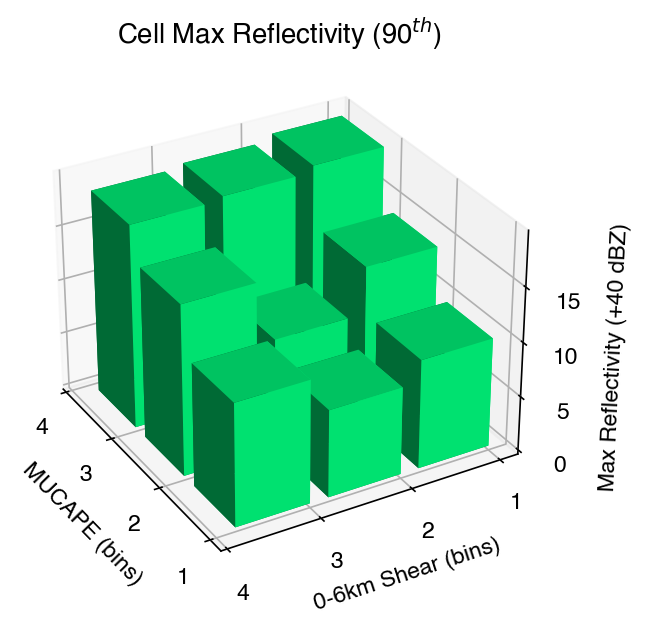

In [60]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = max_dbz_capeshear6mag_pts[idx,:,:].ravel()
top = top - 40
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, 150)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max Reflectivity (+40 dBZ)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Max Reflectivity ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxDBZ_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

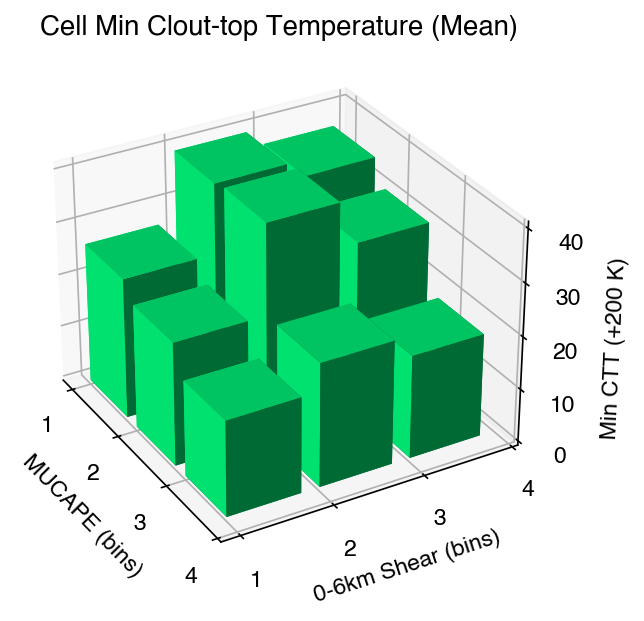

In [66]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# top = nsamples_capeshear6mag.ravel()
qntl = 0.25
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
# top = minctt_capeshear6mag_pts[idx,:,:].ravel()
# top = top-180
top = minctt_capeshear6mag_avg.ravel()
top = top-200
# top = cell_area_capeshear6mag_avg.ravel()
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, -30)
# ax1.set_xlim3d(0,4)
# ax1.set_ylim3d(0,4)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
# ax1.set_xticklabels(cape_range)
# ax1.set_yticklabels(shear6mag_range)
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Min CTT (+200 K)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
# ax1.set_title(f'Cell Min Clout-top Temperature ({qntl*100:.0f}'+'$^{th}$)')
ax1.set_title(f'Cell Min Clout-top Temperature (Mean)')
fig.savefig(f'{figdir_jointhist}MinCTT_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

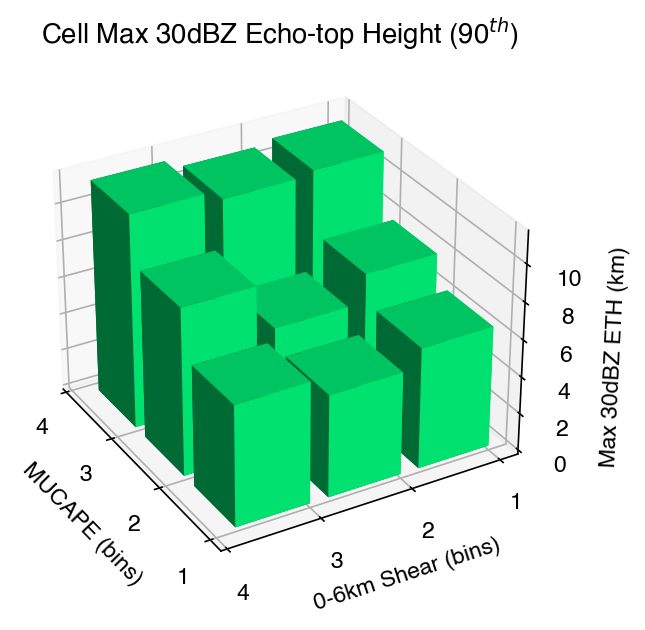

In [67]:
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(10, 10), dpi=150)
ax1 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(cape_bins)-1)+1
_y = np.arange(len(shear6mag_bins)-1)+1
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

qntl = 0.9
# Find quantile bin index
idx = np.where(np.array(quantiles_2d) == qntl)[0].item()
top = max_eth30_capeshear6mag_pts[idx,:,:].ravel()
top = top
bottom = np.zeros_like(top)
width = depth = 0.8

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='springgreen')
ax1.view_init(30, 150)
ax1.set_xticks(np.arange(1,5))
ax1.set_yticks(np.arange(1,5))
xlabel = 'MUCAPE (bins)'
ylabel = '0-6km Shear (bins)'
zlabel = 'Max 30dBZ ETH (km)'
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_zlabel(zlabel)
ax1.set_title(f'Cell Max 30dBZ Echo-top Height ({qntl*100:.0f}'+'$^{th}$)')
fig.savefig(f'{figdir_jointhist}MaxETH30dBZ_MUCAPE_Shear0-6km_3Dbar.png', bbox_inches='tight', dpi=300)

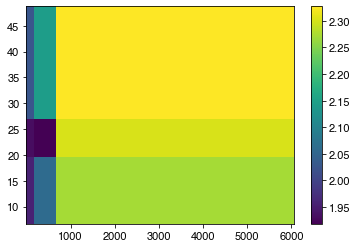

In [68]:
qntl = 0.9
idx = np.where(np.array(quantiles_2d) == qntl)[0]
plt.pcolormesh(cape_range, shear6mag_range, np.log10(cell_area_capeshear6mag_pts[idx,:,:]).squeeze())
plt.colorbar()

In [ ]:
cape_range

In [ ]:
def quantiles3d_by2cond(in_var, x_cond_var, x_cond_range, y_cond_var, y_cond_range, 
                        loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles):
    nbins_x = len(x_cond_range)-1
    nbins_y = len(y_cond_range)-1
    nz = in_var.sizes['z']
    npts = len(quantiles)
    out_var_time0_pts = np.full((npts, nz, nbins_y, nbins_x), np.nan, dtype=np.float)
    out_var_max_pts = np.full((npts, nz, nbins_y, nbins_x), np.nan, dtype=np.float)
    nsamples = np.full((nbins_y, nbins_x), 0, dtype=np.int32)
#     print(nsamples.shape)
    # Loop over two conditional variable bins
    for xbin in range(nbins_x):
        for ybin in range(nbins_y):
#             print(xbin, ybin)
            in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                       (x_cond_var > x_cond_range[xbin]) & (x_cond_var <= x_cond_range[xbin+1]) &
                                       (y_cond_var > y_cond_range[ybin]) & (y_cond_var <= y_cond_range[ybin+1]) &
                                       (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)
            # Replace NaN with a large negative value to take into account decreasing sample with height
            # NaN is excluded in quantile calculations which biases the sampling with increasing height
            fillval = -99
            in_var_cond = in_var_cond.where(~np.isnan(in_var_cond), other=fillval)
            # Number of samples
            nsamples[ybin, xbin] = in_var_cond.sizes['tracks']
            # Initiation and lifetime max profile quantiles
            out_var_time0_pts[:, :, ybin, xbin] = in_var_cond.isel(times=0).quantile(quantiles, dim='tracks', skipna=True).values
            out_var_max_pts[:, :, ybin, xbin] = in_var_cond.max(dim='times').quantile(quantiles, dim='tracks', skipna=True).values
    return (nsamples, out_var_time0_pts, out_var_max_pts)

In [ ]:
quantiles_3d = [0.25,0.5,0.75,0.9]
nsamples_capeshear6mag, max_dbz_prof0_capeshear6mag_pts, max_dbz_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.max_reflectivity, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, dbz20_area_prof0_capeshear6mag_pts, dbz20_area_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, dbz30_area_prof0_capeshear6mag_pts, dbz30_area_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, max_zdr_prof0_capeshear6mag_pts, max_zdr_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.max_zdr, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, max_kdp_prof0_capeshear6mag_pts, max_kdp_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.max_kdp, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, max_rainrate_prof0_capeshear6mag_pts, max_rainrate_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.max_rainrate, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

nsamples_capeshear6mag, max_Dm_prof0_capeshear6mag_pts, max_Dm_maxprof_capeshear6mag_pts = quantiles3d_by2cond(stats.max_Dm, cape, cape_range, shear6mag, shear6mag_range,
                                                                                             start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_3d)

In [ ]:
qntl = 0.5
idx = np.where(np.array(quantiles_3d) == qntl)[0].item()
plt.plot(max_dbz_prof0_capeshear6mag_pts[idx,:,0,0], height, color='b')
plt.plot(max_dbz_prof0_capeshear6mag_pts[idx,:,1,1], height, color='g')
plt.plot(max_dbz_prof0_capeshear6mag_pts[idx,:,2,2], height, color='r')

In [ ]:
def plot_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, legend2, figname):
    mpl.rcParams['font.size'] = 16
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)

    ylims = [1, 15]
    colors = {'low':'blue', 'medium':'green', 'high':'crimson'}
    
    for row in range(2):
        for col in range(3):
            ax = axes[row, col]
            ax.plot(data1_avg[row][col], height, color=colors['low'], lw=5, label=legends[0])
            ax.plot(data2_avg[row][col], height, color=colors['medium'], lw=5, label=legends[1])
            ax.plot(data3_avg[row][col], height, color=colors['high'], lw=5, label=legends[2])
            ax.fill_betweenx(height, data1_pts[row][col][0], data1_pts[row][col][1], color=colors['low'], edgecolor=None, alpha=0.25)
            ax.fill_betweenx(height, data2_pts[row][col][0], data2_pts[row][col][1], color=colors['medium'], edgecolor=None, alpha=0.25)
            ax.fill_betweenx(height, data3_pts[row][col][0], data3_pts[row][col][1], color=colors['high'], edgecolor=None, alpha=0.25)
            ax.grid(ls='--')
            ax.set_xlim(xlims[row][col][0], xlims[row][col][1])
            ax.set_ylim(ylims[0], ylims[1])
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel('Height (km)')
            ax.set_title(titles1[row][col], loc='left')
            ax.set_title(titles2, loc='right', fontsize=14)
            ax.legend(loc='upper right', fontsize=13)
            ax.text(0.95, 0.7, legend2, ha='right', transform=ax.transAxes, fontsize=13)
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    return fig

In [ ]:
shear6mag_range

In [ ]:
f'{cape_range[1]:.0f}'

In [ ]:
idx50 = np.where(np.array(quantiles_3d) == 0.5)[0].item()
idx25 = np.where(np.array(quantiles_3d) == 0.25)[0].item()
idx75 = np.where(np.array(quantiles_3d) == 0.75)[0].item()
ybin = 0  # shear bin value [range: 0-2]
data1_avg = [[max_dbz_prof0_capeshear6mag_pts[idx50,:,ybin,0], np.log10(dbz20_area_prof0_capeshear6mag_pts[idx50,:,ybin,0]), max_kdp_prof0_capeshear6mag_pts[idx50,:,ybin,0]],
             [max_zdr_prof0_capeshear6mag_pts[idx50,:,ybin,0], max_rainrate_prof0_capeshear6mag_pts[idx50,:,ybin,0], max_Dm_prof0_capeshear6mag_pts[idx50,:,ybin,0]]]
data2_avg = [[max_dbz_prof0_capeshear6mag_pts[idx50,:,ybin,1], np.log10(dbz20_area_prof0_capeshear6mag_pts[idx50,:,ybin,1]), max_kdp_prof0_capeshear6mag_pts[idx50,:,ybin,1]],
             [max_zdr_prof0_capeshear6mag_pts[idx50,:,ybin,1], max_rainrate_prof0_capeshear6mag_pts[idx50,:,ybin,1], max_Dm_prof0_capeshear6mag_pts[idx50,:,ybin,1]]]
data3_avg = [[max_dbz_prof0_capeshear6mag_pts[idx50,:,ybin,2], np.log10(dbz20_area_prof0_capeshear6mag_pts[idx50,:,ybin,2]), max_kdp_prof0_capeshear6mag_pts[idx50,:,ybin,2]],
             [max_zdr_prof0_capeshear6mag_pts[idx50,:,ybin,2], max_rainrate_prof0_capeshear6mag_pts[idx50,:,ybin,2], max_Dm_prof0_capeshear6mag_pts[idx50,:,ybin,2]]]
data1_pts = [[(max_dbz_prof0_capeshear6mag_pts[idx25,:,ybin,0], max_dbz_prof0_capeshear6mag_pts[idx75,:,ybin,0]),
              (np.log10(dbz20_area_prof0_capeshear6mag_pts[idx25,:,ybin,0]), np.log10(dbz20_area_prof0_capeshear6mag_pts[idx75,:,ybin,0])),
              (max_kdp_prof0_capeshear6mag_pts[idx25,:,ybin,0], max_kdp_prof0_capeshear6mag_pts[idx75,:,ybin,0])], 
             [(max_zdr_prof0_capeshear6mag_pts[idx25,:,ybin,0], max_zdr_prof0_capeshear6mag_pts[idx75,:,ybin,0]),
              (max_rainrate_prof0_capeshear6mag_pts[idx25,:,ybin,0], max_rainrate_prof0_capeshear6mag_pts[idx75,:,ybin,0]),
              (max_Dm_prof0_capeshear6mag_pts[idx25,:,ybin,0], max_Dm_prof0_capeshear6mag_pts[idx75,:,ybin,0])]]
data2_pts = [[(max_dbz_prof0_capeshear6mag_pts[idx25,:,ybin,1], max_dbz_prof0_capeshear6mag_pts[idx75,:,ybin,1]),
              (np.log10(dbz20_area_prof0_capeshear6mag_pts[idx25,:,ybin,1]), np.log10(dbz20_area_prof0_capeshear6mag_pts[idx75,:,ybin,1])),
              (max_kdp_prof0_capeshear6mag_pts[idx25,:,ybin,1], max_kdp_prof0_capeshear6mag_pts[idx75,:,ybin,1])], 
             [(max_zdr_prof0_capeshear6mag_pts[idx25,:,ybin,1], max_zdr_prof0_capeshear6mag_pts[idx75,:,ybin,1]),
              (max_rainrate_prof0_capeshear6mag_pts[idx25,:,ybin,1], max_rainrate_prof0_capeshear6mag_pts[idx75,:,ybin,1]),
              (max_Dm_prof0_capeshear6mag_pts[idx25,:,ybin,1], max_Dm_prof0_capeshear6mag_pts[idx75,:,ybin,1])]]
data3_pts = [[(max_dbz_prof0_capeshear6mag_pts[idx25,:,ybin,2], max_dbz_prof0_capeshear6mag_pts[idx75,:,ybin,2]),
              (np.log10(dbz20_area_prof0_capeshear6mag_pts[idx25,:,ybin,2]), np.log10(dbz20_area_prof0_capeshear6mag_pts[idx75,:,ybin,2])),
              (max_kdp_prof0_capeshear6mag_pts[idx25,:,ybin,2], max_kdp_prof0_capeshear6mag_pts[idx75,:,ybin,2])], 
             [(max_zdr_prof0_capeshear6mag_pts[idx25,:,ybin,2], max_zdr_prof0_capeshear6mag_pts[idx75,:,ybin,2]),
              (max_rainrate_prof0_capeshear6mag_pts[idx25,:,ybin,2], max_rainrate_prof0_capeshear6mag_pts[idx75,:,ybin,2]),
              (max_Dm_prof0_capeshear6mag_pts[idx25,:,ybin,2], max_Dm_prof0_capeshear6mag_pts[idx75,:,ybin,2])]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_initiation_profile_MUCPAE_shear0-6km_{shear6mag_range[ybin]:.0f}-{shear6mag_range[ybin+1]:.0f}ms.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Initiation)'
legends = [f'MUCAPE ({cape_range[0]:.0f}-{cape_range[1]:.0f} J/kg)', 
           f'MUCAPE ({cape_range[1]:.0f}-{cape_range[2]:.0f} J/kg)', 
           f'MUCAPE ({cape_range[2]:.0f}-{cape_range[3]:.0f} J/kg)']
legend2 = f'0-6km Shear ({shear6mag_range[ybin]:.0f}-{shear6mag_range[ybin+1]:.0f} m/s)'
fig = plot_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, legend2, figname)

In [ ]:
idx50 = np.where(np.array(quantiles_3d) == 0.5)[0].item()
idx25 = np.where(np.array(quantiles_3d) == 0.25)[0].item()
idx75 = np.where(np.array(quantiles_3d) == 0.75)[0].item()
ybin = 0  # shear bin value [range: 0-2]
data1_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,ybin,0], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,ybin,0]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,ybin,0]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,ybin,0], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,ybin,0], max_Dm_maxprof_capeshear6mag_pts[idx50,:,ybin,0]]]
data2_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,ybin,1], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,ybin,1]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,ybin,1]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,ybin,1], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,ybin,1], max_Dm_maxprof_capeshear6mag_pts[idx50,:,ybin,1]]]
data3_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,ybin,2], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,ybin,2]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,ybin,2]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,ybin,2], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,ybin,2], max_Dm_maxprof_capeshear6mag_pts[idx50,:,ybin,2]]]
data1_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,ybin,0], max_dbz_maxprof_capeshear6mag_pts[idx75,:,ybin,0]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,ybin,0]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,ybin,0])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,ybin,0], max_kdp_maxprof_capeshear6mag_pts[idx75,:,ybin,0])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,ybin,0], max_zdr_maxprof_capeshear6mag_pts[idx75,:,ybin,0]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,ybin,0], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,ybin,0]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,ybin,0], max_Dm_maxprof_capeshear6mag_pts[idx75,:,ybin,0])]]
data2_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,ybin,1], max_dbz_maxprof_capeshear6mag_pts[idx75,:,ybin,1]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,ybin,1]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,ybin,1])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,ybin,1], max_kdp_maxprof_capeshear6mag_pts[idx75,:,ybin,1])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,ybin,1], max_zdr_maxprof_capeshear6mag_pts[idx75,:,ybin,1]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,ybin,1], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,ybin,1]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,ybin,1], max_Dm_maxprof_capeshear6mag_pts[idx75,:,ybin,1])]]
data3_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,ybin,2], max_dbz_maxprof_capeshear6mag_pts[idx75,:,ybin,2]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,ybin,2]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,ybin,2])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,ybin,2], max_kdp_maxprof_capeshear6mag_pts[idx75,:,ybin,2])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,ybin,2], max_zdr_maxprof_capeshear6mag_pts[idx75,:,ybin,2]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,ybin,2], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,ybin,2]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,ybin,2], max_Dm_maxprof_capeshear6mag_pts[idx75,:,ybin,2])]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_max_profile_MUCPAE_shear0-6km_{shear6mag_range[ybin]:.0f}-{shear6mag_range[ybin+1]:.0f}ms.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Lifetime Max)'
legends = [f'MUCAPE ({cape_range[0]:.0f}-{cape_range[1]:.0f} J/kg)', 
           f'MUCAPE ({cape_range[1]:.0f}-{cape_range[2]:.0f} J/kg)', 
           f'MUCAPE ({cape_range[2]:.0f}-{cape_range[3]:.0f} J/kg)']
legend2 = f'0-6km Shear ({shear6mag_range[ybin]:.0f}-{shear6mag_range[ybin+1]:.0f} m/s)'
fig = plot_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, legend2, figname)

In [ ]:
idx50 = np.where(np.array(quantiles_3d) == 0.5)[0].item()
idx25 = np.where(np.array(quantiles_3d) == 0.25)[0].item()
idx75 = np.where(np.array(quantiles_3d) == 0.75)[0].item()
xbin = 2  # MUCAPE bin value [range: 0-2]
data1_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,0,xbin], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,0,xbin]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,0,xbin]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,0,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,0,xbin], max_Dm_maxprof_capeshear6mag_pts[idx50,:,0,xbin]]]
data2_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,1,xbin], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,1,xbin]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,1,xbin]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,1,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,1,xbin], max_Dm_maxprof_capeshear6mag_pts[idx50,:,1,xbin]]]
data3_avg = [[max_dbz_maxprof_capeshear6mag_pts[idx50,:,2,xbin], np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx50,:,2,xbin]), max_kdp_maxprof_capeshear6mag_pts[idx50,:,2,xbin]],
             [max_zdr_maxprof_capeshear6mag_pts[idx50,:,2,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx50,:,2,xbin], max_Dm_maxprof_capeshear6mag_pts[idx50,:,2,xbin]]]
data1_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,0,xbin], max_dbz_maxprof_capeshear6mag_pts[idx75,:,0,xbin]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,0,xbin]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,0,xbin])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,0,xbin], max_kdp_maxprof_capeshear6mag_pts[idx75,:,0,xbin])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,0,xbin], max_zdr_maxprof_capeshear6mag_pts[idx75,:,0,xbin]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,0,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,0,xbin]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,0,xbin], max_Dm_maxprof_capeshear6mag_pts[idx75,:,0,xbin])]]
data2_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,1,xbin], max_dbz_maxprof_capeshear6mag_pts[idx75,:,1,xbin]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,1,xbin]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,1,xbin])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,1,xbin], max_kdp_maxprof_capeshear6mag_pts[idx75,:,1,xbin])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,1,xbin], max_zdr_maxprof_capeshear6mag_pts[idx75,:,1,xbin]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,1,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,1,xbin]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,1,xbin], max_Dm_maxprof_capeshear6mag_pts[idx75,:,1,xbin])]]
data3_pts = [[(max_dbz_maxprof_capeshear6mag_pts[idx25,:,2,xbin], max_dbz_maxprof_capeshear6mag_pts[idx75,:,2,xbin]),
              (np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx25,:,2,xbin]), np.log10(dbz20_area_maxprof_capeshear6mag_pts[idx75,:,2,xbin])),
              (max_kdp_maxprof_capeshear6mag_pts[idx25,:,2,xbin], max_kdp_maxprof_capeshear6mag_pts[idx75,:,2,xbin])], 
             [(max_zdr_maxprof_capeshear6mag_pts[idx25,:,2,xbin], max_zdr_maxprof_capeshear6mag_pts[idx75,:,2,xbin]),
              (max_rainrate_maxprof_capeshear6mag_pts[idx25,:,2,xbin], max_rainrate_maxprof_capeshear6mag_pts[idx75,:,2,xbin]),
              (max_Dm_maxprof_capeshear6mag_pts[idx25,:,2,xbin], max_Dm_maxprof_capeshear6mag_pts[idx75,:,2,xbin])]]
xlims = [[(0,55), (0,2.5), (0,3)],
         [(0,8), (0,60), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_max_profile_shear0-6km_MUCAPE_{cape_range[xbin]:.0f}-{cape_range[xbin+1]:.0f}.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Lifetime Max)'
legends = [f'0-6km Shear ({shear6mag_range[0]:.0f}-{shear6mag_range[1]:.0f} m/s)', 
           f'0-6km Shear ({shear6mag_range[1]:.0f}-{shear6mag_range[2]:.0f} m/s)',
           f'0-6km Shear ({shear6mag_range[2]:.0f}-{shear6mag_range[3]:.0f} m/s)',]
legend2 = f'MUCAPE ({cape_range[xbin]:.0f}-{cape_range[xbin+1]:.0f} J/kg)'
fig = plot_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, legend2, figname)

In [ ]:
def quantiles_by1cond(in_var, cond_var, cond_range, loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles):
    in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                (cond_var > cond_range[0]) & (cond_var <= cond_range[1]) & (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)

    nsamples = in_var_cond.sizes['tracks']
    
    # Calculate averages (NaN excluded)
#     out_var_time0_avg = in_var_cond.isel(times=0).mean(dim='tracks')
#     out_var_max_avg = in_var_cond.max(dim='times').mean(dim='tracks')
    
    # Replace NaN with a large negative value to take into account decreasing sample with height
    # NaN is excluded in quantile calculations which biases the sampling with increasing height
    fillval = -99
    in_var_cond = in_var_cond.where(~np.isnan(in_var_cond), other=fillval)
#     in_var_cond_pts = in_var_cond.quantile(quantiles, dim='tracks', skipna=True)

#     quantiles_prof = [0.25,0.5,0.75]
    # Calculate initiation quantiles
    out_var_time0_pts = in_var_cond.isel(times=0).quantile(quantiles, dim='tracks', skipna=True)
    # Calculate max during lifetime quantiles
    out_var_max_pts = in_var_cond.max(dim='times').quantile(quantiles, dim='tracks', skipna=True)
    
    return (nsamples, out_var_time0_pts, out_var_max_pts)

In [ ]:
# quantiles = [0.5,0.75,0.9,0.95]
# max_dbz1_cape = stats.max_reflectivity.where((start_lon >= lon_SDC) & 
#                                         (cape > cape_range1[0]) & (cape <= cape_range1[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
# max_dbz2_cape = stats.max_reflectivity.where((start_lon >= lon_SDC) & 
#                                         (cape > cape_range2[0]) & (cape <= cape_range2[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
# max_dbz3_cape = stats.max_reflectivity.where((start_lon >= lon_SDC) & 
#                                         (cape > cape_range3[0]) & (cape <= cape_range3[1]) & np.isnan(end_merge_tracknumber) & (np.isnan(start_split_tracknumber)), drop=True)
# # Replace NaN with a large negative value to take into account decreasing sample with height
# # NaN is excluded in quantile calculations which biases the sampling with increasing height
# fillval = -99
# max_dbz1_cape = max_dbz1_cape.where(~np.isnan(max_dbz1_cape), other=fillval)
# max_dbz2_cape = max_dbz2_cape.where(~np.isnan(max_dbz2_cape), other=fillval)
# max_dbz3_cape = max_dbz3_cape.where(~np.isnan(max_dbz3_cape), other=fillval)
# max_dbz_dur1_cape_pts = max_dbz1_cape.quantile(quantiles, dim='tracks', skipna=True)
# max_dbz_dur2_cape_pts = max_dbz2_cape.quantile(quantiles, dim='tracks', skipna=True)
# max_dbz_dur3_cape_pts = max_dbz3_cape.quantile(quantiles, dim='tracks', skipna=True)

# quantiles_prof = [0.25,0.5,0.75]
# # Calculate initiation profile quantiles
# max_dbz1_prof0_cape_pts = max_dbz1_cape.isel(times=0).quantile(quantiles_prof, dim='tracks', skipna=True)
# max_dbz2_prof0_cape_pts = max_dbz2_cape.isel(times=0).quantile(quantiles_prof, dim='tracks', skipna=True)
# max_dbz3_prof0_cape_pts = max_dbz3_cape.isel(times=0).quantile(quantiles_prof, dim='tracks', skipna=True)
# # Calculate aggregate profile during the lifetime
# max_dbz1_maxprof_cape_pts = max_dbz1_cape.max(dim='times').quantile(quantiles_prof, dim='tracks', skipna=True)
# max_dbz2_maxprof_cape_pts = max_dbz2_cape.max(dim='times').quantile(quantiles_prof, dim='tracks', skipna=True)
# max_dbz3_maxprof_cape_pts = max_dbz3_cape.max(dim='times').quantile(quantiles_prof, dim='tracks', skipna=True)

In [ ]:
quantiles_prof = [0.25,0.5,0.75]

# Max reflectivity profile
ntracks1_cape, max_dbz1_prof0_cape_pts, max_dbz1_maxprof_cape_pts = quantiles_by1cond(stats.max_reflectivity, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, max_dbz2_prof0_cape_pts, max_dbz2_maxprof_cape_pts = quantiles_by1cond(stats.max_reflectivity, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, max_dbz3_prof0_cape_pts, max_dbz3_maxprof_cape_pts = quantiles_by1cond(stats.max_reflectivity, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
print(f'Number of samples by MUCAPE: {ntracks1_cape}, {ntracks2_cape}, {ntracks3_cape}')
# 20dBZ area
ntracks1_cape, dbz20_area1_prof0_cape_pts, dbz20_area1_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, dbz20_area2_prof0_cape_pts, dbz20_area2_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, dbz20_area3_prof0_cape_pts, dbz20_area3_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# 30dBZ area
ntracks1_cape, dbz30_area1_prof0_cape_pts, dbz30_area1_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, dbz30_area2_prof0_cape_pts, dbz30_area2_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, dbz30_area3_prof0_cape_pts, dbz30_area3_maxprof_cape_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max ZDR profile
ntracks1_cape, max_zdr1_prof0_cape_pts, max_zdr1_maxprof_cape_pts = quantiles_by1cond(stats.max_zdr, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, max_zdr2_prof0_cape_pts, max_zdr2_maxprof_cape_pts = quantiles_by1cond(stats.max_zdr, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, max_zdr3_prof0_cape_pts, max_zdr3_maxprof_cape_pts = quantiles_by1cond(stats.max_zdr, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max KDP profile
ntracks1_cape, max_kdp1_prof0_cape_pts, max_kdp1_maxprof_cape_pts = quantiles_by1cond(stats.max_kdp, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, max_kdp2_prof0_cape_pts, max_kdp2_maxprof_cape_pts = quantiles_by1cond(stats.max_kdp, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, max_kdp3_prof0_cape_pts, max_kdp3_maxprof_cape_pts = quantiles_by1cond(stats.max_kdp, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max rainrate profile
ntracks1_cape, max_rainrate1_prof0_cape_pts, max_rainrate1_maxprof_cape_pts = quantiles_by1cond(stats.max_rainrate, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, max_rainrate2_prof0_cape_pts, max_rainrate2_maxprof_cape_pts = quantiles_by1cond(stats.max_rainrate, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, max_rainrate3_prof0_cape_pts, max_rainrate3_maxprof_cape_pts = quantiles_by1cond(stats.max_rainrate, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max Dm profile
ntracks1_cape, max_Dm1_prof0_cape_pts, max_Dm1_maxprof_cape_pts = quantiles_by1cond(stats.max_Dm, cape, cape_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_cape, max_Dm2_prof0_cape_pts, max_Dm2_maxprof_cape_pts = quantiles_by1cond(stats.max_Dm, cape, cape_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_cape, max_Dm3_prof0_cape_pts, max_Dm3_maxprof_cape_pts = quantiles_by1cond(stats.max_Dm, cape, cape_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)

In [ ]:
q850p_range1 = [2,8]
q850p_range2 = [8,12]
q850p_range3 = [12,20]

# Max reflectivity profile
ntracks1_q850p, max_dbz1_prof0_q850p_pts, max_dbz1_maxprof_q850p_pts = quantiles_by1cond(stats.max_reflectivity, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, max_dbz2_prof0_q850p_pts, max_dbz2_maxprof_q850p_pts = quantiles_by1cond(stats.max_reflectivity, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, max_dbz3_prof0_q850p_pts, max_dbz3_maxprof_q850p_pts = quantiles_by1cond(stats.max_reflectivity, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
print(f'Number of samples by 850hPa q: {ntracks1_q850p}, {ntracks2_q850p}, {ntracks3_q850p}')

# 20dBZ area
ntracks1_q850p, dbz20_area1_prof0_q850p_pts, dbz20_area1_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, dbz20_area2_prof0_q850p_pts, dbz20_area2_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, dbz20_area3_prof0_q850p_pts, dbz20_area3_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# 30dBZ area
ntracks1_q850p, dbz30_area1_prof0_q850p_pts, dbz30_area1_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, dbz30_area2_prof0_q850p_pts, dbz30_area2_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, dbz30_area3_prof0_q850p_pts, dbz30_area3_maxprof_q850p_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max ZDR profile
ntracks1_q850p, max_zdr1_prof0_q850p_pts, max_zdr1_maxprof_q850p_pts = quantiles_by1cond(stats.max_zdr, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, max_zdr2_prof0_q850p_pts, max_zdr2_maxprof_q850p_pts = quantiles_by1cond(stats.max_zdr, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, max_zdr3_prof0_q850p_pts, max_zdr3_maxprof_q850p_pts = quantiles_by1cond(stats.max_zdr, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max KDP profile
ntracks1_q850p, max_kdp1_prof0_q850p_pts, max_kdp1_maxprof_q850p_pts = quantiles_by1cond(stats.max_kdp, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, max_kdp2_prof0_q850p_pts, max_kdp2_maxprof_q850p_pts = quantiles_by1cond(stats.max_kdp, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, max_kdp3_prof0_q850p_pts, max_kdp3_maxprof_q850p_pts = quantiles_by1cond(stats.max_kdp, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max rainrate profile
ntracks1_q850p, max_rainrate1_prof0_q850p_pts, max_rainrate1_maxprof_q850p_pts = quantiles_by1cond(stats.max_rainrate, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, max_rainrate2_prof0_q850p_pts, max_rainrate2_maxprof_q850p_pts = quantiles_by1cond(stats.max_rainrate, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, max_rainrate3_prof0_q850p_pts, max_rainrate3_maxprof_q850p_pts = quantiles_by1cond(stats.max_rainrate, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max Dm profile
ntracks1_q850p, max_Dm1_prof0_q850p_pts, max_Dm1_maxprof_q850p_pts = quantiles_by1cond(stats.max_Dm, q850p, q850p_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_q850p, max_Dm2_prof0_q850p_pts, max_Dm2_maxprof_q850p_pts = quantiles_by1cond(stats.max_Dm, q850p, q850p_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_q850p, max_Dm3_prof0_q850p_pts, max_Dm3_maxprof_q850p_pts = quantiles_by1cond(stats.max_Dm, q850p, q850p_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)

In [ ]:
shear6mag_range1 = [0,20]
shear6mag_range2 = [20,28]
shear6mag_range3 = [28,50]

shear6mag = stats.shear6mag.sel(reltime=0)

# Max reflectivity profile
ntracks1_shear6mag, max_dbz1_prof0_shear6mag_pts, max_dbz1_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_reflectivity, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, max_dbz2_prof0_shear6mag_pts, max_dbz2_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_reflectivity, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, max_dbz3_prof0_shear6mag_pts, max_dbz3_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_reflectivity, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
print(f'Number of samples by 850hPa q: {ntracks1_shear6mag}, {ntracks2_shear6mag}, {ntracks3_shear6mag}')

# 20dBZ area
ntracks1_shear6mag, dbz20_area1_prof0_shear6mag_pts, dbz20_area1_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, dbz20_area2_prof0_shear6mag_pts, dbz20_area2_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, dbz20_area3_prof0_shear6mag_pts, dbz20_area3_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# 30dBZ area
ntracks1_shear6mag, dbz30_area1_prof0_shear6mag_pts, dbz30_area1_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, dbz30_area2_prof0_shear6mag_pts, dbz30_area2_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, dbz30_area3_prof0_shear6mag_pts, dbz30_area3_maxprof_shear6mag_pts = quantiles_by1cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max ZDR profile
ntracks1_shear6mag, max_zdr1_prof0_shear6mag_pts, max_zdr1_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_zdr, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, max_zdr2_prof0_shear6mag_pts, max_zdr2_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_zdr, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, max_zdr3_prof0_shear6mag_pts, max_zdr3_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_zdr, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max KDP profile
ntracks1_shear6mag, max_kdp1_prof0_shear6mag_pts, max_kdp1_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_kdp, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, max_kdp2_prof0_shear6mag_pts, max_kdp2_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_kdp, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, max_kdp3_prof0_shear6mag_pts, max_kdp3_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_kdp, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max rainrate profile
ntracks1_shear6mag, max_rainrate1_prof0_shear6mag_pts, max_rainrate1_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_rainrate, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, max_rainrate2_prof0_shear6mag_pts, max_rainrate2_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_rainrate, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, max_rainrate3_prof0_shear6mag_pts, max_rainrate3_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_rainrate, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
# Max Dm profile
ntracks1_shear6mag, max_Dm1_prof0_shear6mag_pts, max_Dm1_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_Dm, shear6mag, shear6mag_range1, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks2_shear6mag, max_Dm2_prof0_shear6mag_pts, max_Dm2_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_Dm, shear6mag, shear6mag_range2, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)
ntracks3_shear6mag, max_Dm3_prof0_shear6mag_pts, max_Dm3_maxprof_shear6mag_pts = quantiles_by1cond(stats.max_Dm, shear6mag, shear6mag_range3, start_lon, lon_eSDC, 
                                                                        end_merge_tracknumber, start_split_tracknumber, quantiles_prof)

In [ ]:
# dbz20_area1_prof0_cape_pts.sel(quantile=0.5).plot()
# dbz30_area2_prof0_cape_pts.sel(quantile=0.5).plot()
# dbz30_area3_prof0_cape_pts.sel(quantile=0.5).plot()

In [ ]:
def plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname):
    mpl.rcParams['font.size'] = 16
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)

    ylims = [1, 15]
    colors = {'low':'blue', 'medium':'green', 'high':'crimson'}
    
    for row in range(2):
        for col in range(3):
            ax = axes[row, col]
            ax.plot(data1_avg[row][col], height, color=colors['low'], lw=5, label=legends[0])
            ax.plot(data2_avg[row][col], height, color=colors['medium'], lw=5, label=legends[1])
            ax.plot(data3_avg[row][col], height, color=colors['high'], lw=5, label=legends[2])
            ax.fill_betweenx(height, data1_pts[row][col][0], data1_pts[row][col][1], color=colors['low'], edgecolor=None, alpha=0.25)
            ax.fill_betweenx(height, data2_pts[row][col][0], data2_pts[row][col][1], color=colors['medium'], edgecolor=None, alpha=0.25)
            ax.fill_betweenx(height, data3_pts[row][col][0], data3_pts[row][col][1], color=colors['high'], edgecolor=None, alpha=0.25)
            ax.grid(ls='--')
            ax.set_xlim(xlims[row][col][0], xlims[row][col][1])
            ax.set_ylim(ylims[0], ylims[1])
            ax.set_xlabel(xlabels[row][col])
            ax.set_ylabel('Height (km)')
            ax.set_title(titles1[row][col], loc='left')
            ax.set_title(titles2, loc='right', fontsize=14)
            ax.legend(loc='upper right', fontsize=12)
    
    fig.tight_layout()
    fig.savefig(figname, bbox_inches='tight', dpi=300)
    return fig

In [ ]:
data1_avg = [[max_dbz1_prof0_cape_pts.sel(quantile=0.5), np.log10(dbz20_area1_prof0_cape_pts).sel(quantile=0.5), max_kdp1_prof0_cape_pts.sel(quantile=0.5)],
             [max_zdr1_prof0_cape_pts.sel(quantile=0.5), max_rainrate1_prof0_cape_pts.sel(quantile=0.5), max_Dm1_prof0_cape_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_prof0_cape_pts.sel(quantile=0.5), np.log10(dbz20_area2_prof0_cape_pts).sel(quantile=0.5), max_kdp2_prof0_cape_pts.sel(quantile=0.5)],
             [max_zdr2_prof0_cape_pts.sel(quantile=0.5), max_rainrate2_prof0_cape_pts.sel(quantile=0.5), max_Dm2_prof0_cape_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_prof0_cape_pts.sel(quantile=0.5), np.log10(dbz20_area3_prof0_cape_pts).sel(quantile=0.5), max_kdp3_prof0_cape_pts.sel(quantile=0.5)],
             [max_zdr3_prof0_cape_pts.sel(quantile=0.5), max_rainrate3_prof0_cape_pts.sel(quantile=0.5), max_Dm3_prof0_cape_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_prof0_cape_pts.sel(quantile=0.25), max_dbz1_prof0_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_prof0_cape_pts).sel(quantile=0.25), np.log10(dbz20_area1_prof0_cape_pts).sel(quantile=0.75)), 
              (max_kdp1_prof0_cape_pts.sel(quantile=0.25), max_kdp1_prof0_cape_pts.sel(quantile=0.75))],
             [(max_zdr1_prof0_cape_pts.sel(quantile=0.25), max_zdr1_prof0_cape_pts.sel(quantile=0.75)),
              (max_rainrate1_prof0_cape_pts.sel(quantile=0.25), max_rainrate1_prof0_cape_pts.sel(quantile=0.75)),
              (max_Dm1_prof0_cape_pts.sel(quantile=0.25), max_Dm1_prof0_cape_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_prof0_cape_pts.sel(quantile=0.25), max_dbz2_prof0_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_prof0_cape_pts).sel(quantile=0.25), np.log10(dbz20_area2_prof0_cape_pts).sel(quantile=0.75)), 
              (max_kdp2_prof0_cape_pts.sel(quantile=0.25), max_kdp2_prof0_cape_pts.sel(quantile=0.75))],
             [(max_zdr2_prof0_cape_pts.sel(quantile=0.25), max_zdr2_prof0_cape_pts.sel(quantile=0.75)),
              (max_rainrate2_prof0_cape_pts.sel(quantile=0.25), max_rainrate2_prof0_cape_pts.sel(quantile=0.75)),
              (max_Dm2_prof0_cape_pts.sel(quantile=0.25), max_Dm2_prof0_cape_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_prof0_cape_pts.sel(quantile=0.25), max_dbz3_prof0_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_prof0_cape_pts).sel(quantile=0.25), np.log10(dbz20_area3_prof0_cape_pts).sel(quantile=0.75)), 
              (max_kdp3_prof0_cape_pts.sel(quantile=0.25), max_kdp3_prof0_cape_pts.sel(quantile=0.75))],
             [(max_zdr3_prof0_cape_pts.sel(quantile=0.25), max_zdr3_prof0_cape_pts.sel(quantile=0.75)),
              (max_rainrate3_prof0_cape_pts.sel(quantile=0.25), max_rainrate3_prof0_cape_pts.sel(quantile=0.75)),
              (max_Dm3_prof0_cape_pts.sel(quantile=0.25), max_Dm3_prof0_cape_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_initiation_profile_MUCPAE.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Initiation)'
legends = [f'MUCAPE ({cape_range1[0]}-{cape_range1[1]} J/kg)', 
           f'MUCAPE ({cape_range2[0]}-{cape_range2[1]} J/kg)', 
           f'MUCAPE ({cape_range3[0]}-{cape_range3[1]} J/kg)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
data1_avg = [[max_dbz1_maxprof_cape_pts.sel(quantile=0.5), np.log10(dbz20_area1_maxprof_cape_pts).sel(quantile=0.5), max_kdp1_maxprof_cape_pts.sel(quantile=0.5)],
             [max_zdr1_maxprof_cape_pts.sel(quantile=0.5), max_rainrate1_maxprof_cape_pts.sel(quantile=0.5), max_Dm1_maxprof_cape_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_maxprof_cape_pts.sel(quantile=0.5), np.log10(dbz20_area2_maxprof_cape_pts).sel(quantile=0.5), max_kdp2_maxprof_cape_pts.sel(quantile=0.5)],
             [max_zdr2_maxprof_cape_pts.sel(quantile=0.5), max_rainrate2_maxprof_cape_pts.sel(quantile=0.5), max_Dm2_maxprof_cape_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_maxprof_cape_pts.sel(quantile=0.5), np.log10(dbz20_area3_maxprof_cape_pts).sel(quantile=0.5), max_kdp3_maxprof_cape_pts.sel(quantile=0.5)],
             [max_zdr3_maxprof_cape_pts.sel(quantile=0.5), max_rainrate3_maxprof_cape_pts.sel(quantile=0.5), max_Dm3_maxprof_cape_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_maxprof_cape_pts.sel(quantile=0.25), max_dbz1_maxprof_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_maxprof_cape_pts).sel(quantile=0.25), np.log10(dbz20_area1_maxprof_cape_pts).sel(quantile=0.75)), 
              (max_kdp1_maxprof_cape_pts.sel(quantile=0.25), max_kdp1_maxprof_cape_pts.sel(quantile=0.75))],
             [(max_zdr1_maxprof_cape_pts.sel(quantile=0.25), max_zdr1_maxprof_cape_pts.sel(quantile=0.75)),
              (max_rainrate1_maxprof_cape_pts.sel(quantile=0.25), max_rainrate1_maxprof_cape_pts.sel(quantile=0.75)),
              (max_Dm1_maxprof_cape_pts.sel(quantile=0.25), max_Dm1_maxprof_cape_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_maxprof_cape_pts.sel(quantile=0.25), max_dbz2_maxprof_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_maxprof_cape_pts).sel(quantile=0.25), np.log10(dbz20_area2_maxprof_cape_pts).sel(quantile=0.75)), 
              (max_kdp2_maxprof_cape_pts.sel(quantile=0.25), max_kdp2_maxprof_cape_pts.sel(quantile=0.75))],
             [(max_zdr2_maxprof_cape_pts.sel(quantile=0.25), max_zdr2_maxprof_cape_pts.sel(quantile=0.75)),
              (max_rainrate2_maxprof_cape_pts.sel(quantile=0.25), max_rainrate2_maxprof_cape_pts.sel(quantile=0.75)),
              (max_Dm2_maxprof_cape_pts.sel(quantile=0.25), max_Dm2_maxprof_cape_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_maxprof_cape_pts.sel(quantile=0.25), max_dbz3_maxprof_cape_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_maxprof_cape_pts).sel(quantile=0.25), np.log10(dbz20_area3_maxprof_cape_pts).sel(quantile=0.75)), 
              (max_kdp3_maxprof_cape_pts.sel(quantile=0.25), max_kdp3_maxprof_cape_pts.sel(quantile=0.75))],
             [(max_zdr3_maxprof_cape_pts.sel(quantile=0.25), max_zdr3_maxprof_cape_pts.sel(quantile=0.75)),
              (max_rainrate3_maxprof_cape_pts.sel(quantile=0.25), max_rainrate3_maxprof_cape_pts.sel(quantile=0.75)),
              (max_Dm3_maxprof_cape_pts.sel(quantile=0.25), max_Dm3_maxprof_cape_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,3)],
         [(0,8), (0,80), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_max_profile_MUCPAE.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Lifetime Max)'
legends = [f'MUCAPE ({cape_range1[0]}-{cape_range1[1]} J/kg)', 
           f'MUCAPE ({cape_range2[0]}-{cape_range2[1]} J/kg)', 
           f'MUCAPE ({cape_range3[0]}-{cape_range3[1]} J/kg)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
data1_avg = [[max_dbz1_prof0_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area1_prof0_q850p_pts).sel(quantile=0.5), max_kdp1_prof0_q850p_pts.sel(quantile=0.5)],
             [max_zdr1_prof0_q850p_pts.sel(quantile=0.5), max_rainrate1_prof0_q850p_pts.sel(quantile=0.5), max_Dm1_prof0_q850p_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_prof0_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area2_prof0_q850p_pts).sel(quantile=0.5), max_kdp2_prof0_q850p_pts.sel(quantile=0.5)],
             [max_zdr2_prof0_q850p_pts.sel(quantile=0.5), max_rainrate2_prof0_q850p_pts.sel(quantile=0.5), max_Dm2_prof0_q850p_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_prof0_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area3_prof0_q850p_pts).sel(quantile=0.5), max_kdp3_prof0_q850p_pts.sel(quantile=0.5)],
             [max_zdr3_prof0_q850p_pts.sel(quantile=0.5), max_rainrate3_prof0_q850p_pts.sel(quantile=0.5), max_Dm3_prof0_q850p_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_prof0_q850p_pts.sel(quantile=0.25), max_dbz1_prof0_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_prof0_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area1_prof0_q850p_pts).sel(quantile=0.75)), 
              (max_kdp1_prof0_q850p_pts.sel(quantile=0.25), max_kdp1_prof0_q850p_pts.sel(quantile=0.75))],
             [(max_zdr1_prof0_q850p_pts.sel(quantile=0.25), max_zdr1_prof0_q850p_pts.sel(quantile=0.75)),
              (max_rainrate1_prof0_q850p_pts.sel(quantile=0.25), max_rainrate1_prof0_q850p_pts.sel(quantile=0.75)),
              (max_Dm1_prof0_q850p_pts.sel(quantile=0.25), max_Dm1_prof0_q850p_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_prof0_q850p_pts.sel(quantile=0.25), max_dbz2_prof0_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_prof0_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area2_prof0_q850p_pts).sel(quantile=0.75)), 
              (max_kdp2_prof0_q850p_pts.sel(quantile=0.25), max_kdp2_prof0_q850p_pts.sel(quantile=0.75))],
             [(max_zdr2_prof0_q850p_pts.sel(quantile=0.25), max_zdr2_prof0_q850p_pts.sel(quantile=0.75)),
              (max_rainrate2_prof0_q850p_pts.sel(quantile=0.25), max_rainrate2_prof0_q850p_pts.sel(quantile=0.75)),
              (max_Dm2_prof0_q850p_pts.sel(quantile=0.25), max_Dm2_prof0_q850p_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_prof0_q850p_pts.sel(quantile=0.25), max_dbz3_prof0_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_prof0_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area3_prof0_q850p_pts).sel(quantile=0.75)), 
              (max_kdp3_prof0_q850p_pts.sel(quantile=0.25), max_kdp3_prof0_q850p_pts.sel(quantile=0.75))],
             [(max_zdr3_prof0_q850p_pts.sel(quantile=0.25), max_zdr3_prof0_q850p_pts.sel(quantile=0.75)),
              (max_rainrate3_prof0_q850p_pts.sel(quantile=0.25), max_rainrate3_prof0_q850p_pts.sel(quantile=0.75)),
              (max_Dm3_prof0_q850p_pts.sel(quantile=0.25), max_Dm3_prof0_q850p_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_initiation_profile_q850hpa.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Initiation)'
legends = [f'850hPa Q$_v$ ({q850p_range1[0]}-{q850p_range1[1]} g/kg)', 
           f'850hPa Q$_v$ ({q850p_range2[0]}-{q850p_range2[1]} g/kg)', 
           f'850hPa Q$_v$ ({q850p_range3[0]}-{q850p_range3[1]} g/kg)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
data1_avg = [[max_dbz1_maxprof_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area1_maxprof_q850p_pts).sel(quantile=0.5), max_kdp1_maxprof_q850p_pts.sel(quantile=0.5)],
             [max_zdr1_maxprof_q850p_pts.sel(quantile=0.5), max_rainrate1_maxprof_q850p_pts.sel(quantile=0.5), max_Dm1_maxprof_q850p_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_maxprof_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area2_maxprof_q850p_pts).sel(quantile=0.5), max_kdp2_maxprof_q850p_pts.sel(quantile=0.5)],
             [max_zdr2_maxprof_q850p_pts.sel(quantile=0.5), max_rainrate2_maxprof_q850p_pts.sel(quantile=0.5), max_Dm2_maxprof_q850p_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_maxprof_q850p_pts.sel(quantile=0.5), np.log10(dbz20_area3_maxprof_q850p_pts).sel(quantile=0.5), max_kdp3_maxprof_q850p_pts.sel(quantile=0.5)],
             [max_zdr3_maxprof_q850p_pts.sel(quantile=0.5), max_rainrate3_maxprof_q850p_pts.sel(quantile=0.5), max_Dm3_maxprof_q850p_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_maxprof_q850p_pts.sel(quantile=0.25), max_dbz1_maxprof_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_maxprof_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area1_maxprof_q850p_pts).sel(quantile=0.75)), 
              (max_kdp1_maxprof_q850p_pts.sel(quantile=0.25), max_kdp1_maxprof_q850p_pts.sel(quantile=0.75))],
             [(max_zdr1_maxprof_q850p_pts.sel(quantile=0.25), max_zdr1_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_rainrate1_maxprof_q850p_pts.sel(quantile=0.25), max_rainrate1_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_Dm1_maxprof_q850p_pts.sel(quantile=0.25), max_Dm1_maxprof_q850p_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_maxprof_q850p_pts.sel(quantile=0.25), max_dbz2_maxprof_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_maxprof_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area2_maxprof_q850p_pts).sel(quantile=0.75)), 
              (max_kdp2_maxprof_q850p_pts.sel(quantile=0.25), max_kdp2_maxprof_q850p_pts.sel(quantile=0.75))],
             [(max_zdr2_maxprof_q850p_pts.sel(quantile=0.25), max_zdr2_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_rainrate2_maxprof_q850p_pts.sel(quantile=0.25), max_rainrate2_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_Dm2_maxprof_q850p_pts.sel(quantile=0.25), max_Dm2_maxprof_q850p_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_maxprof_q850p_pts.sel(quantile=0.25), max_dbz3_maxprof_q850p_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_maxprof_q850p_pts).sel(quantile=0.25), np.log10(dbz20_area3_maxprof_q850p_pts).sel(quantile=0.75)), 
              (max_kdp3_maxprof_q850p_pts.sel(quantile=0.25), max_kdp3_maxprof_q850p_pts.sel(quantile=0.75))],
             [(max_zdr3_maxprof_q850p_pts.sel(quantile=0.25), max_zdr3_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_rainrate3_maxprof_q850p_pts.sel(quantile=0.25), max_rainrate3_maxprof_q850p_pts.sel(quantile=0.75)),
              (max_Dm3_maxprof_q850p_pts.sel(quantile=0.25), max_Dm3_maxprof_q850p_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_max_profile_q850hpa.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Lifetime Max)'
legends = [f'850hPa Q$_v$ ({q850p_range1[0]}-{q850p_range1[1]} g/kg)', 
           f'850hPa Q$_v$ ({q850p_range2[0]}-{q850p_range2[1]} g/kg)', 
           f'850hPa Q$_v$ ({q850p_range3[0]}-{q850p_range3[1]} g/kg)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
data1_avg = [[max_dbz1_prof0_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area1_prof0_shear6mag_pts).sel(quantile=0.5), max_kdp1_prof0_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr1_prof0_shear6mag_pts.sel(quantile=0.5), max_rainrate1_prof0_shear6mag_pts.sel(quantile=0.5), max_Dm1_prof0_shear6mag_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_prof0_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area2_prof0_shear6mag_pts).sel(quantile=0.5), max_kdp2_prof0_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr2_prof0_shear6mag_pts.sel(quantile=0.5), max_rainrate2_prof0_shear6mag_pts.sel(quantile=0.5), max_Dm2_prof0_shear6mag_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_prof0_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area3_prof0_shear6mag_pts).sel(quantile=0.5), max_kdp3_prof0_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr3_prof0_shear6mag_pts.sel(quantile=0.5), max_rainrate3_prof0_shear6mag_pts.sel(quantile=0.5), max_Dm3_prof0_shear6mag_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_prof0_shear6mag_pts.sel(quantile=0.25), max_dbz1_prof0_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_prof0_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area1_prof0_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp1_prof0_shear6mag_pts.sel(quantile=0.25), max_kdp1_prof0_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr1_prof0_shear6mag_pts.sel(quantile=0.25), max_zdr1_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate1_prof0_shear6mag_pts.sel(quantile=0.25), max_rainrate1_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm1_prof0_shear6mag_pts.sel(quantile=0.25), max_Dm1_prof0_shear6mag_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_prof0_shear6mag_pts.sel(quantile=0.25), max_dbz2_prof0_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_prof0_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area2_prof0_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp2_prof0_shear6mag_pts.sel(quantile=0.25), max_kdp2_prof0_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr2_prof0_shear6mag_pts.sel(quantile=0.25), max_zdr2_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate2_prof0_shear6mag_pts.sel(quantile=0.25), max_rainrate2_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm2_prof0_shear6mag_pts.sel(quantile=0.25), max_Dm2_prof0_shear6mag_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_prof0_shear6mag_pts.sel(quantile=0.25), max_dbz3_prof0_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_prof0_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area3_prof0_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp3_prof0_shear6mag_pts.sel(quantile=0.25), max_kdp3_prof0_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr3_prof0_shear6mag_pts.sel(quantile=0.25), max_zdr3_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate3_prof0_shear6mag_pts.sel(quantile=0.25), max_rainrate3_prof0_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm3_prof0_shear6mag_pts.sel(quantile=0.25), max_Dm3_prof0_shear6mag_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_initiation_profile_shear0-6km.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Initiation)'
legends = [f'0-6km shear ({shear6mag_range1[0]}-{shear6mag_range1[1]} '+'m s$^{-1}$)', 
           f'0-6km shear ({shear6mag_range2[0]}-{shear6mag_range2[1]} '+'m s$^{-1}$)', 
           f'0-6km shear ({shear6mag_range3[0]}-{shear6mag_range3[1]} '+'m s$^{-1}$)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
data1_avg = [[max_dbz1_maxprof_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area1_maxprof_shear6mag_pts).sel(quantile=0.5), max_kdp1_maxprof_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr1_maxprof_shear6mag_pts.sel(quantile=0.5), max_rainrate1_maxprof_shear6mag_pts.sel(quantile=0.5), max_Dm1_maxprof_shear6mag_pts.sel(quantile=0.5)]]
data2_avg = [[max_dbz2_maxprof_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area2_maxprof_shear6mag_pts).sel(quantile=0.5), max_kdp2_maxprof_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr2_maxprof_shear6mag_pts.sel(quantile=0.5), max_rainrate2_maxprof_shear6mag_pts.sel(quantile=0.5), max_Dm2_maxprof_shear6mag_pts.sel(quantile=0.5)]]
data3_avg = [[max_dbz3_maxprof_shear6mag_pts.sel(quantile=0.5), np.log10(dbz20_area3_maxprof_shear6mag_pts).sel(quantile=0.5), max_kdp3_maxprof_shear6mag_pts.sel(quantile=0.5)],
             [max_zdr3_maxprof_shear6mag_pts.sel(quantile=0.5), max_rainrate3_maxprof_shear6mag_pts.sel(quantile=0.5), max_Dm3_maxprof_shear6mag_pts.sel(quantile=0.5)]]
data1_pts = [[(max_dbz1_maxprof_shear6mag_pts.sel(quantile=0.25), max_dbz1_maxprof_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area1_maxprof_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area1_maxprof_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp1_maxprof_shear6mag_pts.sel(quantile=0.25), max_kdp1_maxprof_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr1_maxprof_shear6mag_pts.sel(quantile=0.25), max_zdr1_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate1_maxprof_shear6mag_pts.sel(quantile=0.25), max_rainrate1_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm1_maxprof_shear6mag_pts.sel(quantile=0.25), max_Dm1_maxprof_shear6mag_pts.sel(quantile=0.75))]]
data2_pts = [[(max_dbz2_maxprof_shear6mag_pts.sel(quantile=0.25), max_dbz2_maxprof_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area2_maxprof_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area2_maxprof_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp2_maxprof_shear6mag_pts.sel(quantile=0.25), max_kdp2_maxprof_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr2_maxprof_shear6mag_pts.sel(quantile=0.25), max_zdr2_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate2_maxprof_shear6mag_pts.sel(quantile=0.25), max_rainrate2_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm2_maxprof_shear6mag_pts.sel(quantile=0.25), max_Dm2_maxprof_shear6mag_pts.sel(quantile=0.75))]]
data3_pts = [[(max_dbz3_maxprof_shear6mag_pts.sel(quantile=0.25), max_dbz3_maxprof_shear6mag_pts.sel(quantile=0.75)), 
              (np.log10(dbz20_area3_maxprof_shear6mag_pts).sel(quantile=0.25), np.log10(dbz20_area3_maxprof_shear6mag_pts).sel(quantile=0.75)), 
              (max_kdp3_maxprof_shear6mag_pts.sel(quantile=0.25), max_kdp3_maxprof_shear6mag_pts.sel(quantile=0.75))],
             [(max_zdr3_maxprof_shear6mag_pts.sel(quantile=0.25), max_zdr3_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_rainrate3_maxprof_shear6mag_pts.sel(quantile=0.25), max_rainrate3_maxprof_shear6mag_pts.sel(quantile=0.75)),
              (max_Dm3_maxprof_shear6mag_pts.sel(quantile=0.25), max_Dm3_maxprof_shear6mag_pts.sel(quantile=0.75))]]
xlims = [[(0,55), (0,2.5), (0,1.6)],
         [(0,8), (0,40), (1,4)]]
xlabels = [['Max Reflectivity (dBZ)','log$_{10}$(20dBZ Area (km$^2$))','Max K$_{DP}$ ($\degree$ km$^{-1}$)'],
           ['Max Z$_{DR}$ (dB)','Max RainRate (mm h$^{-1}$)','Max D$_m$ (mm)']]
figname = f'{figdir}cell_max_profile_shear0-6km.png'
titles1 = [['Max Reflectivity', '20dBZ Area', 'Max K$_{DP}$',],
              ['Max Z$_{DR}$', 'Max RainRate', 'Max D$_m$']]
titles2 = '(Lifetime Max)'
legends = [f'0-6km shear ({shear6mag_range1[0]}-{shear6mag_range1[1]} '+'m s$^{-1}$)', 
           f'0-6km shear ({shear6mag_range2[0]}-{shear6mag_range2[1]} '+'m s$^{-1}$)', 
           f'0-6km shear ({shear6mag_range3[0]}-{shear6mag_range3[1]} '+'m s$^{-1}$)']
fig = plot_init_profiles_6panel(data1_avg, data2_avg, data3_avg, data1_pts, data2_pts, data3_pts, height, xlims, xlabels, titles1, titles2, legends, figname)

In [ ]:
def quantiles_by2cond(in_var, cond1_var, cond1_range, cond2_var, cond2_range, loc_var, loc_range, merge_tracknumber, split_tracknumber, quantiles):
    in_var_cond = in_var.where((loc_var >= loc_range[0]) & (loc_var <= loc_range[1]) &
                                (cond1_var > cond1_range[0]) & (cond1_var <= cond1_range[1]) & 
                                (cond2_var > cond2_range[0]) & (cond2_var <= cond2_range[1]) & 
                                (np.isnan(merge_tracknumber)) & (np.isnan(split_tracknumber)), drop=True)

    nsamples = in_var_cond.sizes['tracks']
    
    # Replace NaN with a large negative value to take into account decreasing sample with height
    # NaN is excluded in quantile calculations which biases the sampling with increasing height
    fillval = -99
    in_var_cond = in_var_cond.where(~np.isnan(in_var_cond), other=fillval)
    
    # Get time-series quantile
    out_var_cond_pts = in_var_cond.quantile(quantiles, dim='tracks', skipna=True)

#     # Calculate initiation quantiles
#     out_var_time0_pts = in_var_cond.isel(times=0).quantile(quantiles, dim='tracks', skipna=True)
#     # Calculate max during lifetime quantiles
#     out_var_max_pts = in_var_cond.max(dim='times').quantile(quantiles, dim='tracks', skipna=True)
    
    return (nsamples, out_var_cond_pts)

In [ ]:
# lifetime_range1 = [0.4,0.5]
# lifetime_range2 = [0.9,1]
lifetime_range1 = [1.7,2.1]
lifetime_range2 = [1.7,2.1]
lifetime_range3 = [1.7,2.1]
quantiles_timeseries = [0.5,0.9]

# Max reflectivity profile
ntracks1_capelifetime, max_dbz1_prof_capelifetime_pts = quantiles_by2cond(stats.max_reflectivity, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, max_dbz2_prof_capelifetime_pts = quantiles_by2cond(stats.max_reflectivity, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, max_dbz3_prof_capelifetime_pts = quantiles_by2cond(stats.max_reflectivity, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
print(ntracks1_capelifetime, ntracks2_capelifetime, ntracks3_capelifetime)

# 20dBZ area profile
ntracks1_capelifetime, dbz20_area1_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, dbz20_area2_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, dbz20_area3_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# 30dBZ area profile
ntracks1_capelifetime, dbz30_area1_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, dbz30_area2_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, dbz30_area3_prof_capelifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max KDP profile
ntracks1_capelifetime, max_kdp1_prof_capelifetime_pts = quantiles_by2cond(stats.max_kdp, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, max_kdp2_prof_capelifetime_pts = quantiles_by2cond(stats.max_kdp, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, max_kdp3_prof_capelifetime_pts = quantiles_by2cond(stats.max_kdp, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max ZDR profile
ntracks1_capelifetime, max_zdr1_prof_capelifetime_pts = quantiles_by2cond(stats.max_zdr, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, max_zdr2_prof_capelifetime_pts = quantiles_by2cond(stats.max_zdr, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, max_zdr3_prof_capelifetime_pts = quantiles_by2cond(stats.max_zdr, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max rainrate profile
ntracks1_capelifetime, max_rainrate1_prof_capelifetime_pts = quantiles_by2cond(stats.max_rainrate, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, max_rainrate2_prof_capelifetime_pts = quantiles_by2cond(stats.max_rainrate, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, max_rainrate3_prof_capelifetime_pts = quantiles_by2cond(stats.max_rainrate, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max Dm profile
ntracks1_capelifetime, max_Dm1_prof_capelifetime_pts = quantiles_by2cond(stats.max_Dm, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, max_Dm2_prof_capelifetime_pts = quantiles_by2cond(stats.max_Dm, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, max_Dm3_prof_capelifetime_pts = quantiles_by2cond(stats.max_Dm, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max vol. rain profile
ntracks1_capelifetime, volrain1_prof_capelifetime_pts = quantiles_by2cond(stats.volrain, cape, cape_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_capelifetime, volrain2_prof_capelifetime_pts = quantiles_by2cond(stats.volrain, cape, cape_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_capelifetime, volrain3_prof_capelifetime_pts = quantiles_by2cond(stats.volrain, cape, cape_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)

In [ ]:
# Max reflectivity profile
ntracks1_q850plifetime, max_dbz1_prof_q850plifetime_pts = quantiles_by2cond(stats.max_reflectivity, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, max_dbz2_prof_q850plifetime_pts = quantiles_by2cond(stats.max_reflectivity, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, max_dbz3_prof_q850plifetime_pts = quantiles_by2cond(stats.max_reflectivity, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
print(ntracks1_q850plifetime, ntracks2_q850plifetime, ntracks3_q850plifetime)

# 20dBZ area profile
ntracks1_q850plifetime, dbz20_area1_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, dbz20_area2_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, dbz20_area3_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# 30dBZ area profile
ntracks1_q850plifetime, dbz30_area1_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, dbz30_area2_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, dbz30_area3_prof_q850plifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max KDP profile
ntracks1_q850plifetime, max_kdp1_prof_q850plifetime_pts = quantiles_by2cond(stats.max_kdp, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, max_kdp2_prof_q850plifetime_pts = quantiles_by2cond(stats.max_kdp, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, max_kdp3_prof_q850plifetime_pts = quantiles_by2cond(stats.max_kdp, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max ZDR profile
ntracks1_q850plifetime, max_zdr1_prof_q850plifetime_pts = quantiles_by2cond(stats.max_zdr, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, max_zdr2_prof_q850plifetime_pts = quantiles_by2cond(stats.max_zdr, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, max_zdr3_prof_q850plifetime_pts = quantiles_by2cond(stats.max_zdr, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max rainrate profile
ntracks1_q850plifetime, max_rainrate1_prof_q850plifetime_pts = quantiles_by2cond(stats.max_rainrate, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, max_rainrate2_prof_q850plifetime_pts = quantiles_by2cond(stats.max_rainrate, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, max_rainrate3_prof_q850plifetime_pts = quantiles_by2cond(stats.max_rainrate, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max Dm profile
ntracks1_q850plifetime, max_Dm1_prof_q850plifetime_pts = quantiles_by2cond(stats.max_Dm, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, max_Dm2_prof_q850plifetime_pts = quantiles_by2cond(stats.max_Dm, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, max_Dm3_prof_q850plifetime_pts = quantiles_by2cond(stats.max_Dm, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max vol. rain profile
ntracks1_q850plifetime, volrain1_prof_q850plifetime_pts = quantiles_by2cond(stats.volrain, q850p, q850p_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_q850plifetime, volrain2_prof_q850plifetime_pts = quantiles_by2cond(stats.volrain, q850p, q850p_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_q850plifetime, volrain3_prof_q850plifetime_pts = quantiles_by2cond(stats.volrain, q850p, q850p_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)

In [ ]:
# Max reflectivity profile
ntracks1_shear6maglifetime, max_dbz1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_reflectivity, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, max_dbz2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_reflectivity, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, max_dbz3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_reflectivity, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
print(ntracks1_shear6maglifetime, ntracks2_shear6maglifetime, ntracks3_shear6maglifetime)

# 20dBZ area profile
ntracks1_shear6maglifetime, dbz20_area1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, dbz20_area2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, dbz20_area3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz20 * pixel_radius**2, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# 30dBZ area profile
ntracks1_shear6maglifetime, dbz30_area1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, dbz30_area2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, dbz30_area3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.npix_dbz30 * pixel_radius**2, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max KDP profile
ntracks1_shear6maglifetime, max_kdp1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_kdp, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, max_kdp2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_kdp, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, max_kdp3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_kdp, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max ZDR profile
ntracks1_shear6maglifetime, max_zdr1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_zdr, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, max_zdr2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_zdr, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, max_zdr3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_zdr, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max rainrate profile
ntracks1_shear6maglifetime, max_rainrate1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_rainrate, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, max_rainrate2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_rainrate, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, max_rainrate3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_rainrate, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max Dm profile
ntracks1_shear6maglifetime, max_Dm1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_Dm, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, max_Dm2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_Dm, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, max_Dm3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.max_Dm, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
# Max vol. rain profile
ntracks1_shear6maglifetime, volrain1_prof_shear6maglifetime_pts = quantiles_by2cond(stats.volrain, shear6mag, shear6mag_range1, lifetime, lifetime_range1, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks2_shear6maglifetime, volrain2_prof_shear6maglifetime_pts = quantiles_by2cond(stats.volrain, shear6mag, shear6mag_range2, lifetime, lifetime_range2, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)
ntracks3_shear6maglifetime, volrain3_prof_shear6maglifetime_pts = quantiles_by2cond(stats.volrain, shear6mag, shear6mag_range3, lifetime, lifetime_range3, 
                                                                         start_lon, lon_eSDC, end_merge_tracknumber, start_split_tracknumber, quantiles_timeseries)

In [ ]:
def plot_timeheight_3panel(times, heights, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, quantile, legend, figname, oob_colors=None):

    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['figure.facecolor'] = 'white'
    fig, axs = plt.subplots(1, 3, figsize=[15,4], dpi=100)

    cmap = copy.copy(plt.get_cmap(cmap))
    norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
    xlabels = 'Hour since initiation'
    ylabels = ['Height (km)','','']

    pcm_save = []
    for col in range(3):
        ax1 = axs[col]
        Zm = np.ma.masked_invalid(dataarr[col])
        Zm = np.ma.masked_where(Zm <= 0, Zm)
        pcm = ax1.pcolormesh(times, heights, Zm, shading='auto', norm=norm, cmap=cmap)
        ax1.set_xlabel(xlabels)
        ax1.set_ylabel(ylabels[col])
        ax1.set_title(titles[col], loc='left', fontsize=16)
#         ax1.set_title(f'{quantile:.0f}'+'$^{th}$ percentile', loc='right', fontsize=12)
        ax1.set_xlim(np.min(xlims), np.max(xlims))
        ax1.set_ylim(np.min(ylims), np.max(ylims))
        ax1.set_yticks(yticks)
        ax1.grid(ls='--')
        ax1.text(0.02, 0.9, f'{quantile:.0f}'+'$^{th}$', ha='left', transform=ax1.transAxes)
        ax1.text(.98, .9, legend[col], ha='right', transform=ax1.transAxes)
        if oob_colors is not None:
            pcm.cmap.set_over(oob_colors['over'])
            pcm.cmap.set_under(oob_colors['under'])
            pcm.set_clim(min(levels), max(levels))
    # Save pcolormesh object for plotting colorbar
    pcm_save.append(pcm)

    # Adjust the layout before plotting colorbar
    fig.tight_layout()

    # Colorbar
    cbar = fig.colorbar(pcm_save[0], ax=axs[:], shrink=1, pad=0.02, label=cblabel, extend='both')
    cbar.set_ticks(cbticks)

    fig.savefig(figname, bbox_inches='tight', dpi=300)

In [ ]:
times_hour = times * time_res
# legend = [f'E.SDC ({ntracks1_capelifetime})', f'E.SDC ({ntracks2_capelifetime})', f'E.SDC ({ntracks3_capelifetime})',]
legend = [f'Lifetime {lifetime_range1[0]}-{lifetime_range1[1]} hr ({ntracks1_capelifetime})', 
          f'Lifetime {lifetime_range2[0]}-{lifetime_range2[1]} hr ({ntracks2_capelifetime})', 
          f'Lifetime {lifetime_range3[0]}-{lifetime_range3[1]} hr ({ntracks3_capelifetime})',]
qntl = 0.5
dataarr = [max_dbz1_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz2_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz3_prof_capelifetime_pts.sel(quantile=qntl).transpose()]
levels = np.arange(0, 60.1, 1)
cbticks = np.arange(0, 60.1, 10)
cmap = 'gist_ncar'
xlims = (-0.15,2.2)
ylims = (0,18)
yticks = np.arange(0,18.1,3)
titles = [f'(a) MUCAPE ({cape_range1[0]}-{cape_range1[1]} J/kg)', 
          f'(b) MUCAPE ({cape_range2[0]}-{cape_range2[1]} J/kg)', 
          f'(c) MUCAPE ({cape_range3[0]}-{cape_range3[1]} J/kg)']
cblabel = 'Max Reflectivity (dBZ)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxdbz_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [np.log10(dbz20_area1_prof_capelifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz20_area2_prof_capelifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz20_area3_prof_capelifetime_pts).sel(quantile=qntl).transpose()]
levels = np.arange(0.8, 2.81, 0.1)
cbticks = np.arange(0.8, 2.81, 0.4)
cmap = 'Spectral_r'
cblabel = 'Log$_{10}$(20dBZ Area (km$^2$))'
figname = f'{figdir}celltrack_composite_profile_evolution_area20dbz_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'darkviolet', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [np.log10(dbz30_area1_prof_capelifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area2_prof_capelifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area3_prof_capelifetime_pts).sel(quantile=qntl).transpose()]
levels = np.arange(0.8, 2.41, 0.1)
cbticks = np.arange(0.8, 2.41, 0.2)
cmap = 'Spectral_r'
cblabel = 'Log$_{10}$(30dBZ Area (km$^2$))'
figname = f'{figdir}celltrack_composite_profile_evolution_area30dbz_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'darkviolet', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_zdr1_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr2_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr3_prof_capelifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(1, 10.1, 0.1)
# cbticks = np.arange(1, 10.1, 1)
levels = np.arange(0, 6.1, 0.05)
cbticks = np.arange(0, 6.1, 1)
cmap = 'gist_ncar'
cblabel = 'Max Z$_{DR}$ (dB)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxzdr_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_kdp1_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp2_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp3_prof_capelifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(0, 6.51, 0.1)
# cbticks = np.arange(0, 6.51, 1)
levels = np.arange(0, 4.51, 0.1)
cbticks = np.arange(0, 4.51, 0.5)
cmap = 'gist_ncar'
cblabel = 'Max K$_{DP}$ ($\degree$ km$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxkdp_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_rainrate1_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate2_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate3_prof_capelifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(10, 120.1, 5)
# cbticks = np.arange(10, 120.1, 10)
levels = np.arange(0, 100.1, 2)
cbticks = np.arange(0, 100.1, 20)
cmap = 'gist_ncar'
cblabel = 'Max RainRate (mm h$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxrainrate_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_Dm1_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm2_prof_capelifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm3_prof_capelifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(3, 4.41, 0.05)
# cbticks = np.arange(3, 4.41, 0.2)
levels = np.arange(2, 3.81, 0.05)
cbticks = np.arange(2, 3.81, 0.2)
cmap = 'jet'
cblabel = 'Max D$_m$ (mm)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxDm_{qntl*100:.0f}quantile_MUCAPE.png'
oob_colors = {'over':'magenta', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
legend = [f'Lifetime {lifetime_range1[0]}-{lifetime_range1[1]} hr ({ntracks1_q850plifetime})', 
          f'Lifetime {lifetime_range2[0]}-{lifetime_range2[1]} hr ({ntracks2_q850plifetime})', 
          f'Lifetime {lifetime_range3[0]}-{lifetime_range3[1]} hr ({ntracks3_q850plifetime})',]
qntl = 0.5
dataarr = [max_dbz1_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz2_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz3_prof_q850plifetime_pts.sel(quantile=qntl).transpose()]
levels = np.arange(0, 60.1, 1)
cbticks = np.arange(0, 60.1, 10)
cmap = 'gist_ncar'
xlims = (-0.15,2.2)
ylims = (0,18)
yticks = np.arange(0,18.1,3)
titles = [f'(a) 850hPa Q$_v$ ({q850p_range1[0]}-{q850p_range1[1]} '+'g kg$^{-1}$)', 
          f'(b) 850hPa Q$_v$ ({q850p_range2[0]}-{q850p_range2[1]} '+'g kg$^{-1}$)', 
          f'(c) 850hPa Q$_v$ ({q850p_range3[0]}-{q850p_range3[1]} '+'g kg$^{-1}$)']
cblabel = 'Max Reflectivity (dBZ)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxdbz_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [np.log10(dbz30_area1_prof_q850plifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area2_prof_q850plifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area3_prof_q850plifetime_pts).sel(quantile=qntl).transpose()]
levels = np.arange(0.8, 2.41, 0.1)
cbticks = np.arange(0.8, 2.41, 0.2)
cmap = 'Spectral_r'
cblabel = 'Log$_{10}$(30dBZ Area (km$^2$))'
figname = f'{figdir}celltrack_composite_profile_evolution_area30dbz_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'darkviolet', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_zdr1_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr2_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr3_prof_q850plifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(1, 10.1, 0.1)
# cbticks = np.arange(1, 10.1, 1)
levels = np.arange(0, 6.1, 0.05)
cbticks = np.arange(0, 6.1, 1)
cmap = 'gist_ncar'
cblabel = 'Max Z$_{DR}$ (dB)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxzdr_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_kdp1_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp2_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp3_prof_q850plifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(0, 6.51, 0.1)
# cbticks = np.arange(0, 6.51, 1)
levels = np.arange(0, 4.51, 0.1)
cbticks = np.arange(0, 4.51, 0.5)
cmap = 'gist_ncar'
cblabel = 'Max K$_{DP}$ ($\degree$ km$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxkdp_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_rainrate1_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate2_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate3_prof_q850plifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(10, 120.1, 5)
# cbticks = np.arange(10, 120.1, 10)
levels = np.arange(0, 100.1, 2)
cbticks = np.arange(0, 100.1, 20)
cmap = 'gist_ncar'
cblabel = 'Max RainRate (mm h$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxrainrate_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_Dm1_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm2_prof_q850plifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm3_prof_q850plifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(3, 4.41, 0.05)
# cbticks = np.arange(3, 4.41, 0.2)
levels = np.arange(2, 3.81, 0.05)
cbticks = np.arange(2, 3.81, 0.2)
cmap = 'jet'
cblabel = 'Max D$_m$ (mm)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxDm_{qntl*100:.0f}quantile_q850hpa.png'
oob_colors = {'over':'magenta', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
legend = [f'Lifetime {lifetime_range1[0]}-{lifetime_range1[1]} hr ({ntracks1_shear6maglifetime})', 
          f'Lifetime {lifetime_range2[0]}-{lifetime_range2[1]} hr ({ntracks2_shear6maglifetime})', 
          f'Lifetime {lifetime_range3[0]}-{lifetime_range3[1]} hr ({ntracks3_shear6maglifetime})',]
qntl = 0.5
dataarr = [max_dbz1_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz2_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_dbz3_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose()]
levels = np.arange(0, 60.1, 1)
cbticks = np.arange(0, 60.1, 10)
cmap = 'gist_ncar'
xlims = (-0.15,2.2)
ylims = (0,18)
yticks = np.arange(0,18.1,3)
titles = [f'(a) 0-6km shear ({shear6mag_range1[0]}-{shear6mag_range1[1]} '+'m s$^{-1}$)', 
          f'(b) 0-6km shear ({shear6mag_range2[0]}-{shear6mag_range2[1]} '+'m s$^{-1}$)', 
          f'(c) 0-6km shear ({shear6mag_range3[0]}-{shear6mag_range3[1]} '+'m s$^{-1}$)']
cblabel = 'Max Reflectivity (dBZ)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxdbz_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [np.log10(dbz30_area1_prof_shear6maglifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area2_prof_shear6maglifetime_pts).sel(quantile=qntl).transpose(), 
           np.log10(dbz30_area3_prof_shear6maglifetime_pts).sel(quantile=qntl).transpose()]
levels = np.arange(0.8, 2.41, 0.1)
cbticks = np.arange(0.8, 2.41, 0.2)
cmap = 'Spectral_r'
cblabel = 'Log$_{10}$(30dBZ Area (km$^2$))'
figname = f'{figdir}celltrack_composite_profile_evolution_area30dbz_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'darkviolet', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_zdr1_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr2_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_zdr3_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(1, 10.1, 0.1)
# cbticks = np.arange(1, 10.1, 1)
levels = np.arange(0, 6.1, 0.05)
cbticks = np.arange(0, 6.1, 1)
cmap = 'gist_ncar'
cblabel = 'Max Z$_{DR}$ (dB)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxzdr_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_kdp1_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp2_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_kdp3_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(0, 6.51, 0.1)
# cbticks = np.arange(0, 6.51, 1)
levels = np.arange(0, 4.51, 0.1)
cbticks = np.arange(0, 4.51, 0.5)
cmap = 'gist_ncar'
cblabel = 'Max K$_{DP}$ ($\degree$ km$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxkdp_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_rainrate1_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate2_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_rainrate3_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(10, 120.1, 5)
# cbticks = np.arange(10, 120.1, 10)
levels = np.arange(0, 100.1, 2)
cbticks = np.arange(0, 100.1, 20)
cmap = 'gist_ncar'
cblabel = 'Max RainRate (mm h$^{-1}$)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxrainrate_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'white', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)

In [ ]:
qntl = 0.5
dataarr = [max_Dm1_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm2_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose(), 
           max_Dm3_prof_shear6maglifetime_pts.sel(quantile=qntl).transpose()]
# levels = np.arange(3, 4.41, 0.05)
# cbticks = np.arange(3, 4.41, 0.2)
levels = np.arange(2, 3.81, 0.05)
cbticks = np.arange(2, 3.81, 0.2)
cmap = 'jet'
cblabel = 'Max D$_m$ (mm)'
figname = f'{figdir}celltrack_composite_profile_evolution_maxDm_{qntl*100:.0f}quantile_shear0-6km.png'
oob_colors = {'over':'magenta', 'under':'white'}
fig = plot_timeheight_3panel(times_hour, height, dataarr, levels, cmap, xlims, ylims, yticks, titles, cblabel, cbticks, qntl*100, legend, figname, oob_colors=oob_colors)